#  Поиск, выявление и анализ причин возникновения убытков развлекательного приложения Procrastinate Pro+

## Описание проекта 

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. 

<b>Заказчик:</b> Собственники и руководство компании<br>
<b>Цель:</b>  Разобраться в причинах и помочь компании выйти в плюс<br> 


О качестве данных ничего не известно, поэтому перед подтверждением гипотезы потребуется обзор данных. Мы проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки мы поищем возможность исправить самые критичные ошибки данных. Затем проведем исследовательский анализ и закончим все выводами, полученными в ходе исследования.<br><br>
Таким образом исследование пройдет в три этапа:<br>
1. Изучение данных
2. Предобработка данных
3. Исследовательский анализ
4. Маркетинглвая аналитика
5. Выводы


### Изучение данных

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


In [4]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    visits = pd.read_csv('visits_info_short.csv')
    orders = pd.read_csv('orders_info_short.csv')
    costs = pd.read_csv('costs_info_short.csv')

Изучим загруженные данные:

In [5]:
display(visits.head())
display(orders.head())
costs.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Посмотрим что с типами данных в таблицах:

In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


В таблице даты - 'Session Start' и 'Session End' представлены в виде строк - необходимо преобразование в тип datetime

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Такая же ситуация с датой - 'Event Dt' - представлена строкой, также произведем преобразование в datetime

In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Здесь тоже дата 'dt' в виде строки - преобразуем в datetime

Преобразование типов данных из строк в даты:

In [9]:
visits['Session Start'] = pd.to_datetime(visits['Session Start'])
visits['Session End'] = pd.to_datetime(visits['Session End'])
orders['Event Dt'] =  pd.to_datetime(orders['Event Dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

Также ни в одной таблице мы не увидели пропусков данных!

### Проверка на наличие дубликатов:

In [10]:
visits.duplicated().sum()

0

В таблице visits дубликаты отсутствуют!

In [11]:
orders.duplicated().sum()

0

В таблице orders дубликаты отсутствуют!

In [12]:
costs.duplicated().sum()

0

В таблице costs дубликаты отсутствуют!

Таким образом во всем таблицах дубликаты данных отсутствуют

### Посмотрим раcпределение данных в датафреймах

#### Датафрейм visits:

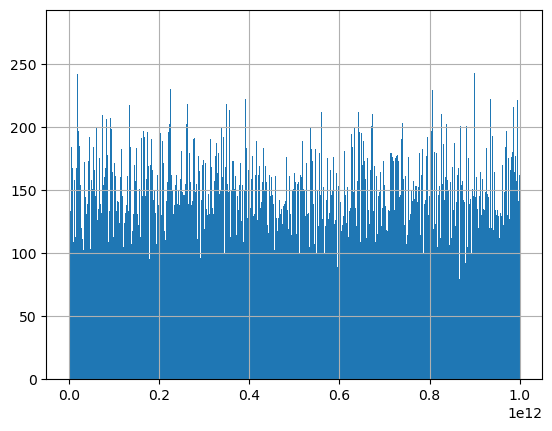

In [13]:
visits['User Id'].hist(bins=2000);

Распределение уникальных номеров пользователей говорит, что аномалий нет, каких-то закономерностей тоже нет. 

In [14]:
visits['Session Start'].max() - visits['Session Start'].min()

Timedelta('183 days 23:58:42')

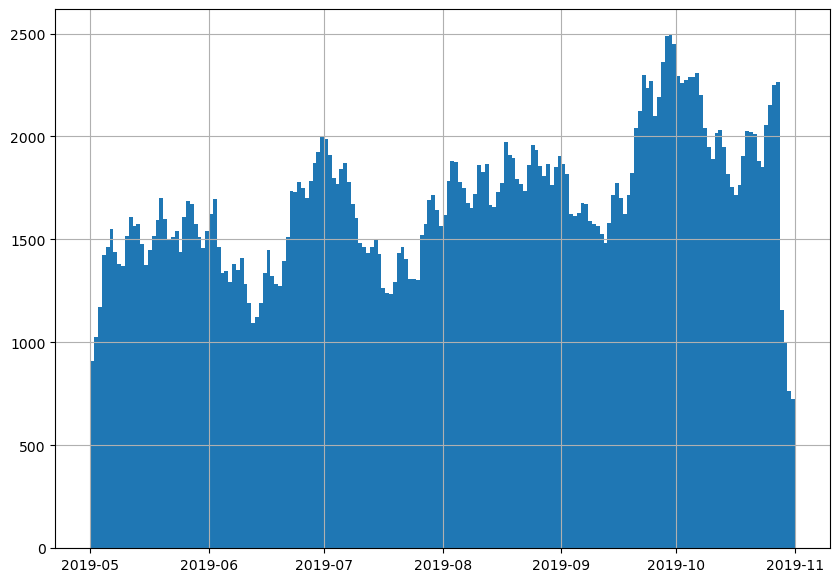

In [15]:
visits['Session Start'].hist(bins=184, figsize=(10,7));

На гистограмме мы наблюдаем следующие моменты:
 - аномалии и выбросы отстутстуют
 - общий рост кол-ва сессий с изменением времеи с 2019-05 к 2019-11
 - наблюдается периодичность роста и падения кол-ва сессий как на уровне месяцев, так и на уровне недель

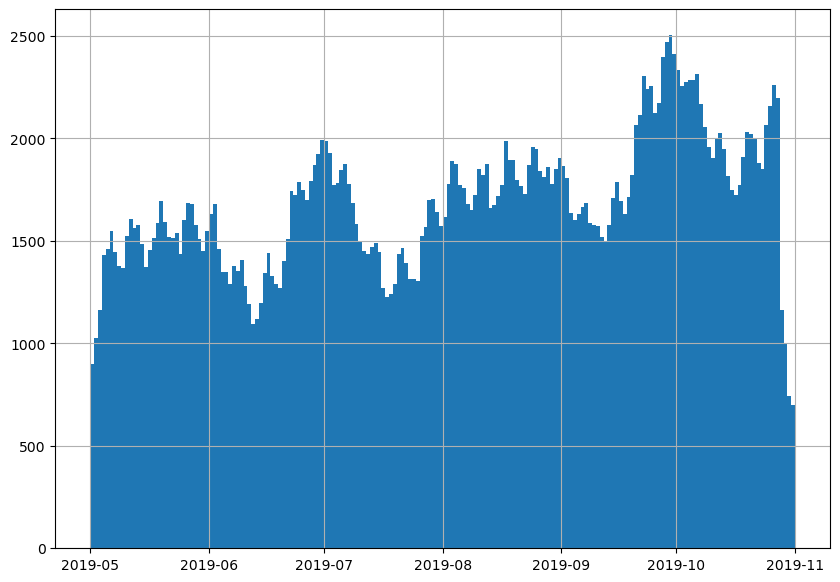

In [16]:
visits['Session End'].hist(bins=184, figsize=(10,7));

Здесь наблюдаются те же моменты, что и на гистограмме выше

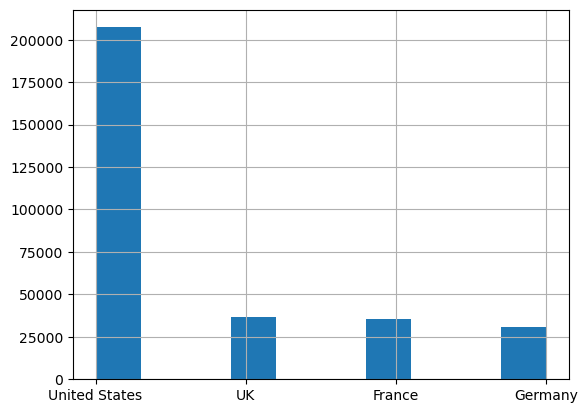

In [17]:
visits['Region'].hist();

На гистограмме не видно выбросов и аномалий, клиенты расспределены по 4 странам:
 - США - самое большое кол-во посещений
 - UK 
 - France
 - Germany - самое маленькое кол-во посещений

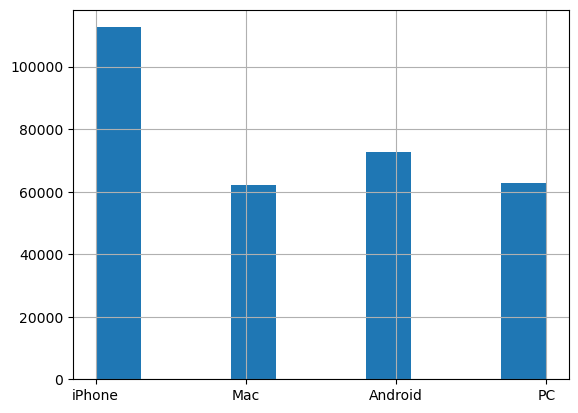

In [18]:
visits['Device'].hist();

Данные распределены по четерым категориям:
- Iphone - максимальное кол-во посещений
- Mac - минимальное кол-во посещений
- Android 
- PC  

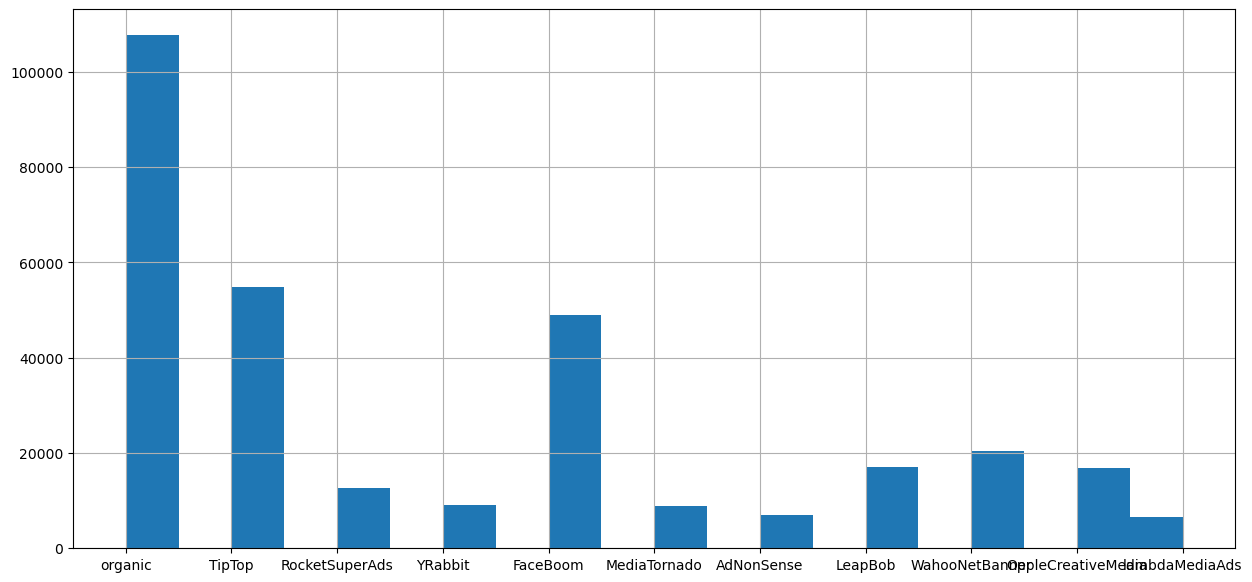

In [19]:
visits['Channel'].hist(bins=20, figsize=(15,7));

Данные распределены без выбросов и аномалий по 11 категориям рекламных источников переходов клиентов.
Больше всего переходов было сделано с бесплатной органической рекламы. Возьмем это на заметку!

### Датафрейм orders:

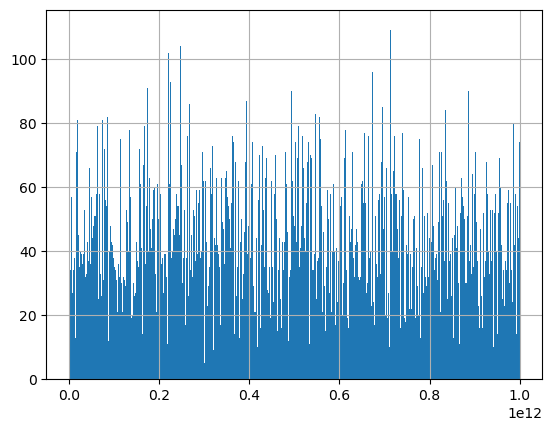

In [20]:
orders['User Id'].hist(bins=900);

На гистограмме абсолютно-случайное распределение, как и должно быть со уникальными идентификаторами пользователей

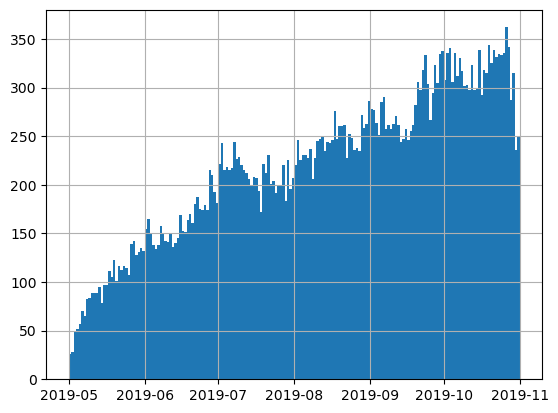

In [21]:
orders['Event Dt'].hist(bins=184);

На гистограмме мы видим рост кол-ва покупок с изменением времени от 2019-05 к 2019-11

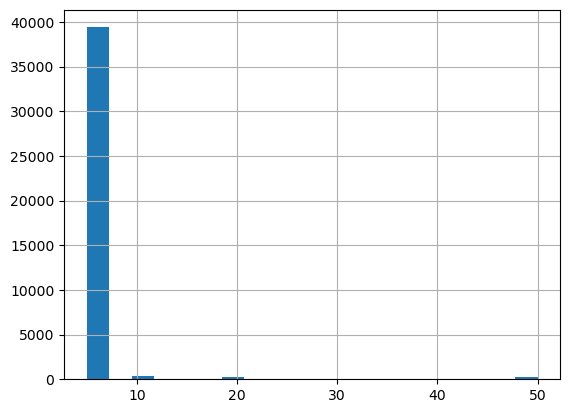

In [22]:
orders['Revenue'].hist(bins=20);

данные распределены от 0 до 50 с макимумом покупок в интервале от 0 до 10. 

### Датафрейм costs:

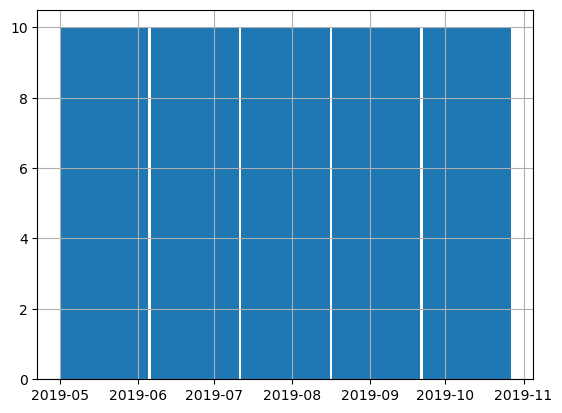

In [23]:
costs['dt'].hist(bins=184);

данные распределены равномерно на протяжении всего периода исследования, т.е рекламные кампании проводяися ежедневно по 10 каналам, с перерывами оплаты через месяц с небольшим.

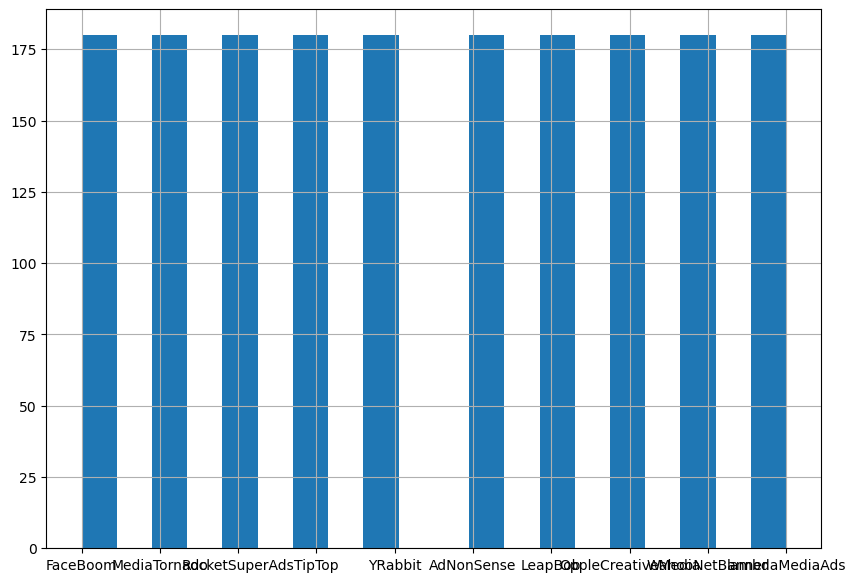

In [24]:
costs['Channel'].hist(figsize=(10,7), bins=20);

Еще одно подтверждение что все каналы равномерно, по кол-ву, оплачивались в течении всего времени

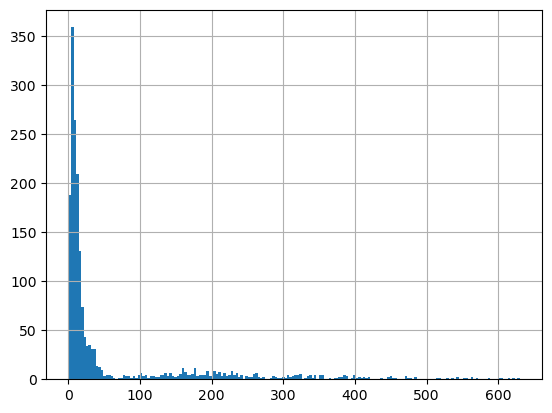

In [25]:
costs['costs'].hist(bins=184);

данные распределены от 0 до 650 с максимумом с интервале [0, 100] - имеют вид Пуассоновского распределения, т.е оплаты были в основном не большие

Подведем итоги того что мы увидели в распределении данных:
1. Кол-во сессий имеет тенденцию к увеличению с течением времени, с определенной периодикой колебаний в течении недели и месяца.
2. В основном клиенты приходиили с беплатного поиска
3. Кол-во покупок растет, опять же  с течением времени.
4. Основные покупки происходят до 10 у.е.
5. Рекламные кампании оплачивались по каналам и дням равномерно(кол-во) в течение всего периода исследования.
6. Оплаты происходили в основном небольшими суммами до 100 у.е.

Рост продаж в течении периода исследования, большое кол-во клиентов пришедших с бесплатного поиска и убытки не очень совместимые понятия.
Будем разбираться!

## Исследовательский анализ

### Функции

добавим функции необходимые нам для дальнейшего анализа

In [26]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'device': 'first',
                'channel': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    profiles['dt'] = pd.to_datetime(profiles['dt'])
    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            # проверяем, встречается ли каждый пользователь
            # среди тех, кто совершил событие event
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )
    #print(profiles.head())
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и device из индексов
    )
    new_users['dt'] = pd.to_datetime(new_users['dt'])
    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
        
    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

In [27]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [28]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [29]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


In [30]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [31]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [32]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [33]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Анализ срезов данных в ракурсе регионов, устройст и каналов привлечения

#### Построим профили пользователей с добавлением стоимости их привлечения:

Преобразуем названия столбцов в подходящие для использования в выше приведенных функциях.
Для этого приведем все названия к нижнему регистру:

In [34]:
visits.columns = map(str.lower, visits.columns)
orders.columns = map(str.lower, orders.columns)
costs.columns = map(str.lower, costs.columns)


и заменим пробелы на знаки подчеркивания:

In [35]:
visits.columns = [x.replace(' ', '_') for x in visits.columns]
orders.columns = [x.replace(' ', '_') for x in orders.columns]
costs.columns = [x.replace(' ', '_') for x in costs.columns]

In [36]:
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [37]:
profiles = get_profiles(visits, orders,None, costs)

Определим минимальную и максимальную даты привлечения пользователей

In [38]:
dt_min = profiles['first_ts'].min()
dt_max = profiles['first_ts'].max()
print(f'Минимальная дата: {dt_min}, максимальная дата: {dt_max}')

Минимальная дата: 2019-05-01 00:00:41, максимальная дата: 2019-10-27 23:59:04


#### Страны и платящие пользователи

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [39]:
region_payer = profiles.pivot_table(index='region', columns='payer', values='user_id', aggfunc='nunique').reset_index().rename(columns={False:'dont_pay', True:'pay'})
region_payer['pay_percent'] = (region_payer['pay'] / (region_payer['dont_pay'] + region_payer['pay']) * 100).round(2)
region_payer.sort_values(by='pay_percent', ascending=False)

payer,region,dont_pay,pay,pay_percent
3,United States,93100,6902,6.90
1,Germany,14365,616,4.11
2,UK,16875,700,3.98
0,France,16787,663,3.80


Мы видим, что больше всего приходят в приложение из США, там же самое большое кол-во платящих пользователей и первое место по доле платящих пользователей. Далее идут Германия, Великобритания и Франция. У Великобритании и Франции кол-во примерно одинаковое, как по общего числу, так и по кол-ву платящих пользователей, но по доле платящих пользователей их опережает Германия, занимающая 2 место после США. 

#### Устройства и платящие клиенты

Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [40]:
device_payer = profiles.pivot_table(index='device', columns='payer', values='user_id', aggfunc='nunique').reset_index().rename(columns={False:'dont_pay', True:'pay'})
device_payer['pay_percent'] = (device_payer['pay'] / (device_payer['dont_pay'] + device_payer['pay']) * 100).round(2)
device_payer.sort_values(by='pay_percent', ascending=False)

payer,device,dont_pay,pay,pay_percent
1,Mac,28130,1912,6.36
3,iPhone,51097,3382,6.21
0,Android,32982,2050,5.85
2,PC,28918,1537,5.05


Мы видим, что по доле платящих пользователей на первом месте утсройства Mac, хотя по общему кол-ву пользователей этот сегмент устройств занимает послее место, за Mac идет iPhone, но при этом он имеет наибольшее кол-во пользователей среди всех сегментов устройств. Далее идет сегмент Android устройств, который имеет меньшую долю по сравнению с Mac и iPhone, но больше во всех отношениях (общее кол-во, кол-во и доля платящих клиентов) сегмента PC устройств, который занимает посленее 4 место. 

#### Каналы и платящие клиенты

In [41]:
channel_payer = profiles.pivot_table(index='channel', columns='payer', values='user_id', aggfunc='nunique').reset_index().rename(columns={False:'dont_pay', True:'pay'})
channel_payer['pay_percent'] = (channel_payer['pay'] / (channel_payer['dont_pay'] + channel_payer['pay']) * 100).round(2)
channel_payer.sort_values(by='pay_percent', ascending=False)

payer,channel,dont_pay,pay,pay_percent
1,FaceBoom,25587,3557,12.20
0,AdNonSense,3440,440,11.34
9,lambdaMediaAds,1924,225,10.47
6,TipTop,17683,1878,9.60
5,RocketSuperAds,4096,352,7.91
7,WahooNetBanner,8100,453,5.30
8,YRabbit,4147,165,3.83
3,MediaTornado,4208,156,3.57
2,LeapBob,8291,262,3.06
4,OppleCreativeMedia,8372,233,2.71


Мы видим, что максимальная доля платящих пользователей пришла из FaceBoom что составляет 12.2%, из TipTop пришли 9.6% платящих ползователей. Это 4 позиция по доле, при этом по общему кол-ву пользователей он идет сразу за FaceBoom, который в свою очередь идет следом по общему кол-ву пользователей за organic. Organic приводит самое большое кол-во пользователей, но и кол-во платящих, как и их доля в этом канале самая маленькая.

### Маркетинговый анализ

#### Общая сумма расходов на маркетинг

In [42]:
total_marleting_cost = costs['costs'].sum()
total_marleting_cost

105497.30000000002

Общие расходы за весь период составили 105497 у.е. Без добполнительных сведений невозможно сказать много это или мало.

#### Расходы по рекламным источникам

In [43]:
costs_channel = costs.pivot_table(index='channel', values='costs', aggfunc='sum').sort_values(by='costs', ascending=False)
costs_channel['percent'] = (costs_channel['costs'] / 105497.3 * 100).round(2)
costs_channel

,costs,percent
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


Два рекламных источника: TipTop и FaceBoom составляют 80% от всех рекламных расходов компании. На оставшиеся рекламные источники приходится от 1% до 4% от всего маркетингового бюджета. Таким образом маркетологи решили в основном использовать для привлечения 2 канала. Остальные по остаточному признаку. Далее посмотрим на сколько оправдалась их стратегия.

#### Динамика расходов во времения

In [44]:
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month

In [45]:
time_costs_m = costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='mean')
time_costs_w = costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='mean')

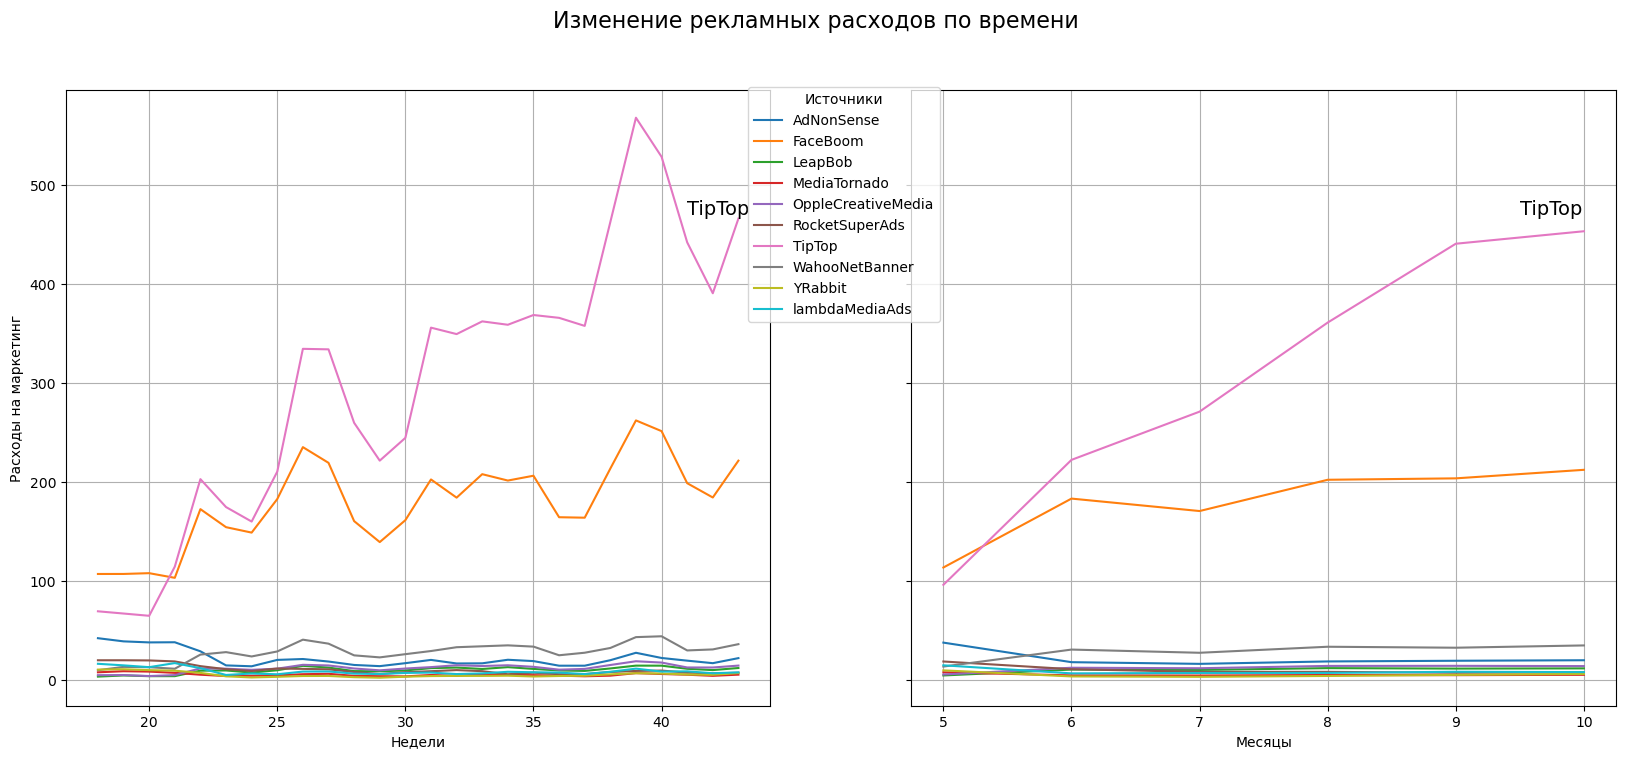

In [46]:
plt.suptitle('Изменение рекламных расходов по времени', fontsize=16)
ax1=plt.subplot(1,2,1)
time_costs_w.plot(figsize=(20,8), grid=True, ylabel='Расходы на маркетинг', ax=ax1)
plt.text(41, 470,'TipTop', fontsize=14)
plt.xlabel('Недели')
plt.legend().set_visible(False)
ax2=plt.subplot(1,2,2, sharey=ax1)
time_costs_m.plot(figsize=(20,8), grid=True, ax=ax2);
plt.text(9.5, 470,'TipTop', fontsize=14)
plt.xlabel('Месяцы')
plt.legend(title='Источники', title_fontsize=10, prop={'size':10}, bbox_to_anchor=(0.05,1.015))
plt.show()


На грфике мы видим общий рост рекламных расходов в течении всего времени, с перидическими спадами в активности с промежутков в один с небольшим месяц. Подобную завасимость мы уже наблюдали ранее когда исследовали данные по клиентам(сессии). Теперь понятно, что периодичность сессий напрямую связана с маркетинговой актиностью компании. <br>
При этом из-за слишком большой разницы в маркетинговых бюджетах рекламных источников кроме 2-х каналов на графике сложно анализировать остальные.
Уберем 2 наиболее крупных рекламных источника и посмотрим что происходит с остальными:

In [47]:
time_costs_m = costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='mean')
time_costs_m2 = time_costs_m[['AdNonSense', 'LeapBob', 'MediaTornado','OppleCreativeMedia', 'RocketSuperAds', 'WahooNetBanner',
       'YRabbit', 'lambdaMediaAds']]
time_costs_w = costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='mean')
time_costs_w2 = time_costs_w[['AdNonSense', 'LeapBob', 'MediaTornado','OppleCreativeMedia', 'RocketSuperAds', 'WahooNetBanner',
       'YRabbit', 'lambdaMediaAds']]

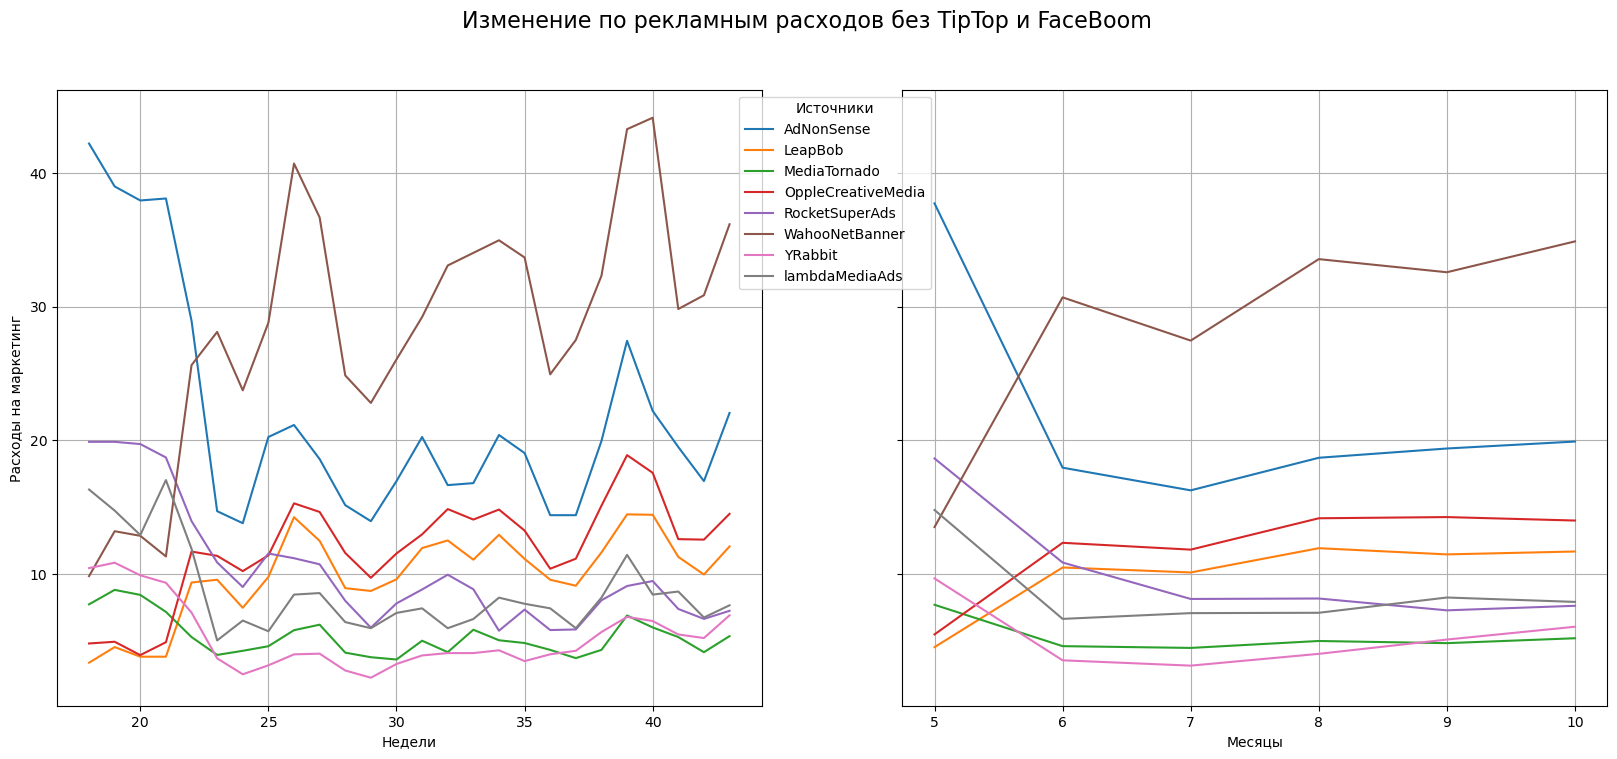

In [48]:
plt.suptitle('Изменение по рекламным расходов без TipTop и FaceBoom', fontsize=16)
ax1=plt.subplot(1,2,1)
time_costs_w2.plot(figsize=(20,8), grid=True, ylabel='Расходы на маркетинг', ax=ax1)
plt.xlabel('Недели')
plt.legend().set_visible(False)
ax2=plt.subplot(1,2,2, sharey=ax1)
time_costs_m2.plot(figsize=(20,8), grid=True, ax=ax2);
plt.xlabel('Месяцы')
plt.legend(title='Источники', title_fontsize=10, prop={'size':10}, bbox_to_anchor=(0.05,1))
plt.show()

На этом графике мы также наблюдаем картину роста маркетинговых расходов в течении всего временного периода с приодами спада и падения через мецяц с небольшим от предыдущего. В дополнении к 2 источникам с предыдущего графика на этом можно выделить еще один источник рекламы с активным ростом расходов - WahooNetBanner. Остальные источники имеют незначитльный рост, также с периодами роста и падения. 

#### Стоимость привлечение одного пользователя в каждом канале

In [49]:
cac_channel = profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='mean').sort_values(by='acquisition_cost', ascending=False)
cac_channel

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Здесь мы также наблюдаем, что у TipTop и FaceBoom самые высокие соимости привлечения клиентов, правда к ним в плотную приблизился по этому показателю канал AdNonSense.

In [50]:
profiles.query('~channel.isin(["organic"])')['acquisition_cost'].mean()

1.1274813239427588

После расчетов средних по каналам и среднего по всему датасету видно, что TipTop значительно превышает среднее по всем данным, при этом FaceBoom соответствует среднему по датасету.

### Окупаемость рекламы

Отфильтруем пользователей пришедших с organic, т.к они не стоили ничего:   

In [51]:
profiles_no = profiles.query('~channel.isin(["organic"])')
user_id_no = profiles_no['user_id'].unique()
orders_no = orders.query('user_id.isin(@user_id_no)')
visits_no = visits.query('~channel.isin(["organic"])')

#### Все пользователи

In [52]:
observation_date = datetime(2019,11,1)
horizon = 14

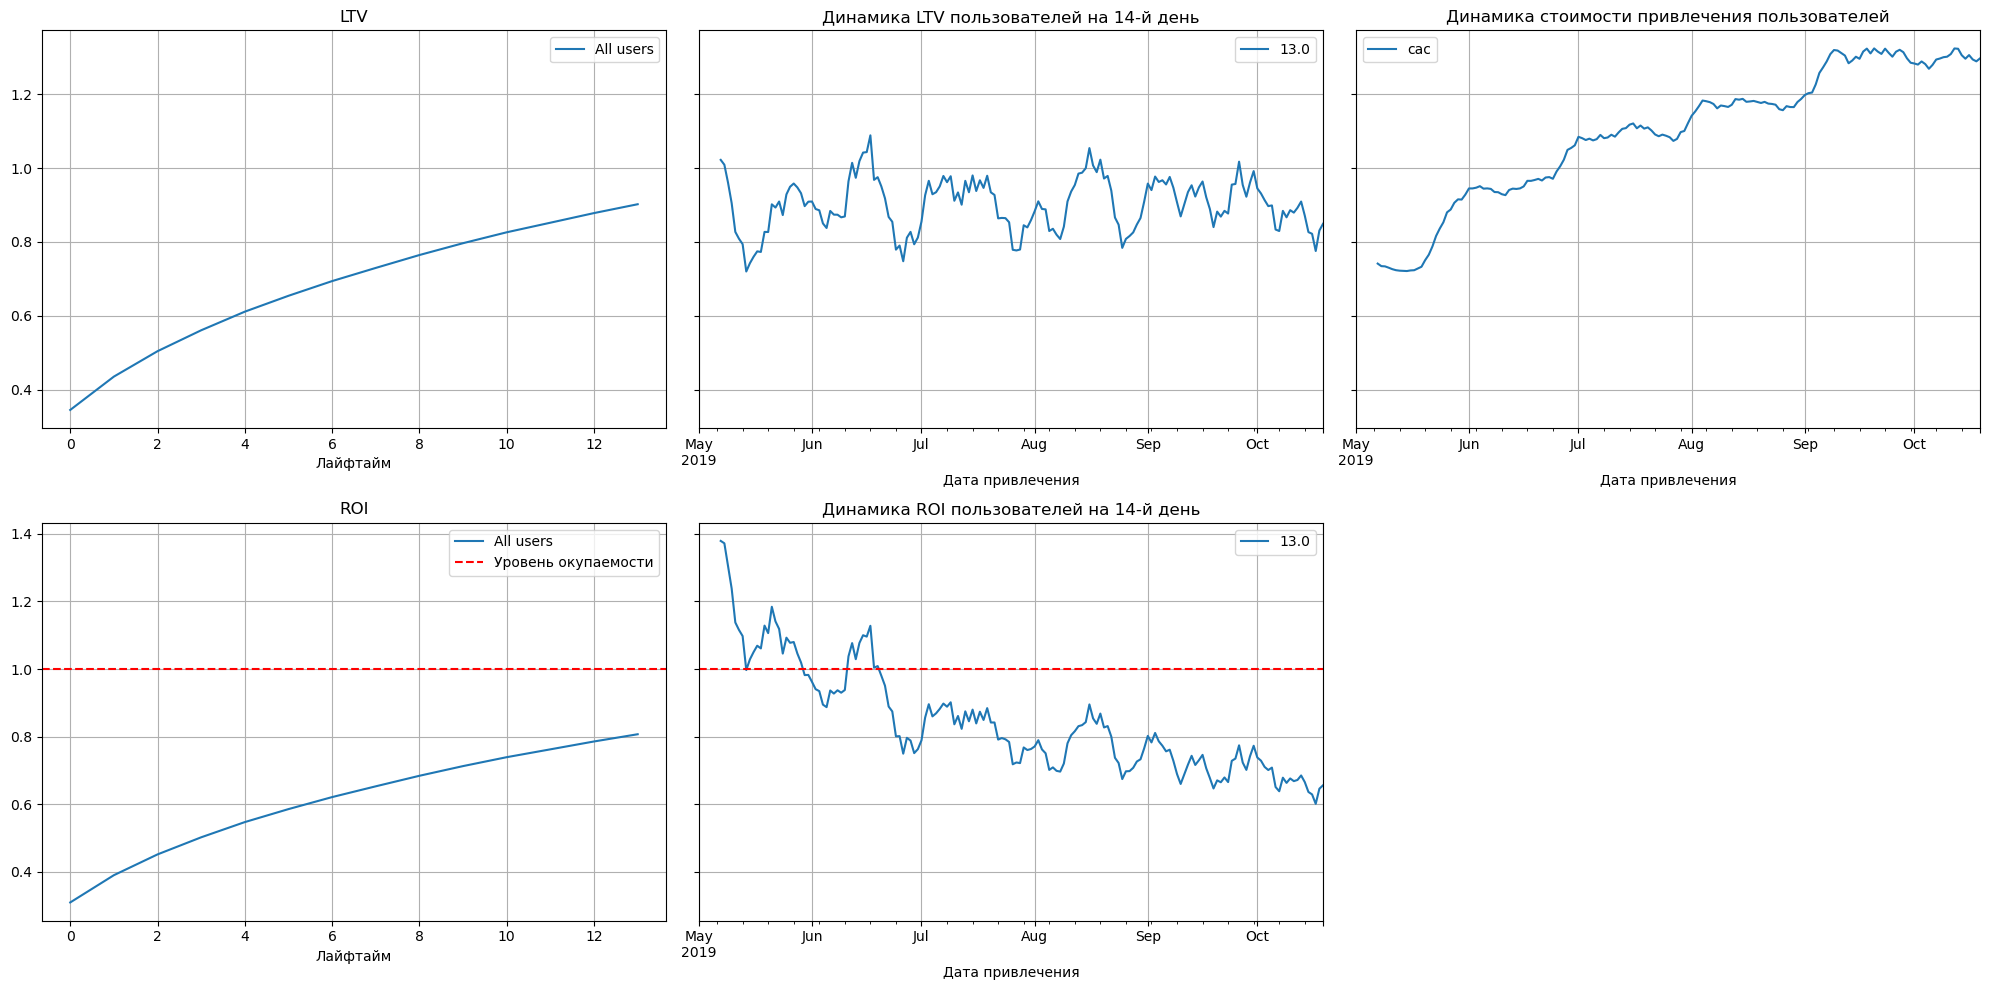

In [53]:
ltv_raw, ltv_grouped, ltv_history,roi_grouped, roi_history = get_ltv(profiles_no, orders_no, observation_date, horizon)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, 14) 

1. LTV пользователей равномерно растет с 0 по 14 день - здесь все нормально
2. Динамика LTV на 14 день (день окупаемостии) имеет вид "пилы". В разные периоды времени динамика то резко повышается, то резко понижается. При этом в течении всего срока колебания происходят в одном диапазоне и они никак не связаны со маркетинговыми расходами. 
3. Стоимость привлечения клиентов имеет вид "ступенек" - со небольшой стабилизацией с начала и до конца месяца. В момент смены одного месяца на другой происходит скачок стоимости привлечения (переход на другую, более высокую ступень) и далее опять происходит стабилизация до конца месяца.
В целом такая картина говорит о том что маркетологи не очень смотрят на этот параметр, их в основном интересует сколько пользователей пришли к ним в приложение. В принципе для стартапа такая логика имеет место быть, если после привлечения клиентов с ними качественно работают и кол-во клиентов переходит в качество или в деньги, другими словами.
4. Уровень окупаемости не достигается на 14 день, т.е этот показатель не выполняется, что естественно плохо. 
5. Судя по динамике окупаемости на 14 день, это показатель выполнялся до середины июня, после чего выполняться перестал. В целом динамика показателя негативная и нужно в деталях разбираться в чем дело. Стратегия здесь простая либо еще больше увеличить кол-во пользователей, но это в свою оченрь полечет рост стоимости привлечения, что и так маркетологи делали весь срок - результата не достигли, либо повысить продажи (конверсию) при существующих клиентах. Это мне видится как наиболее правильный, в данном случае, шаг.

Посмотрим на качество полученных клиентов. Для этого визуализируем коэффициенты удержания платящих и не платящих клиентов:

In [54]:
retention_raw, retention_grouped, retention_history = get_retention(profiles_no, visits_no, observation_date, horizon)

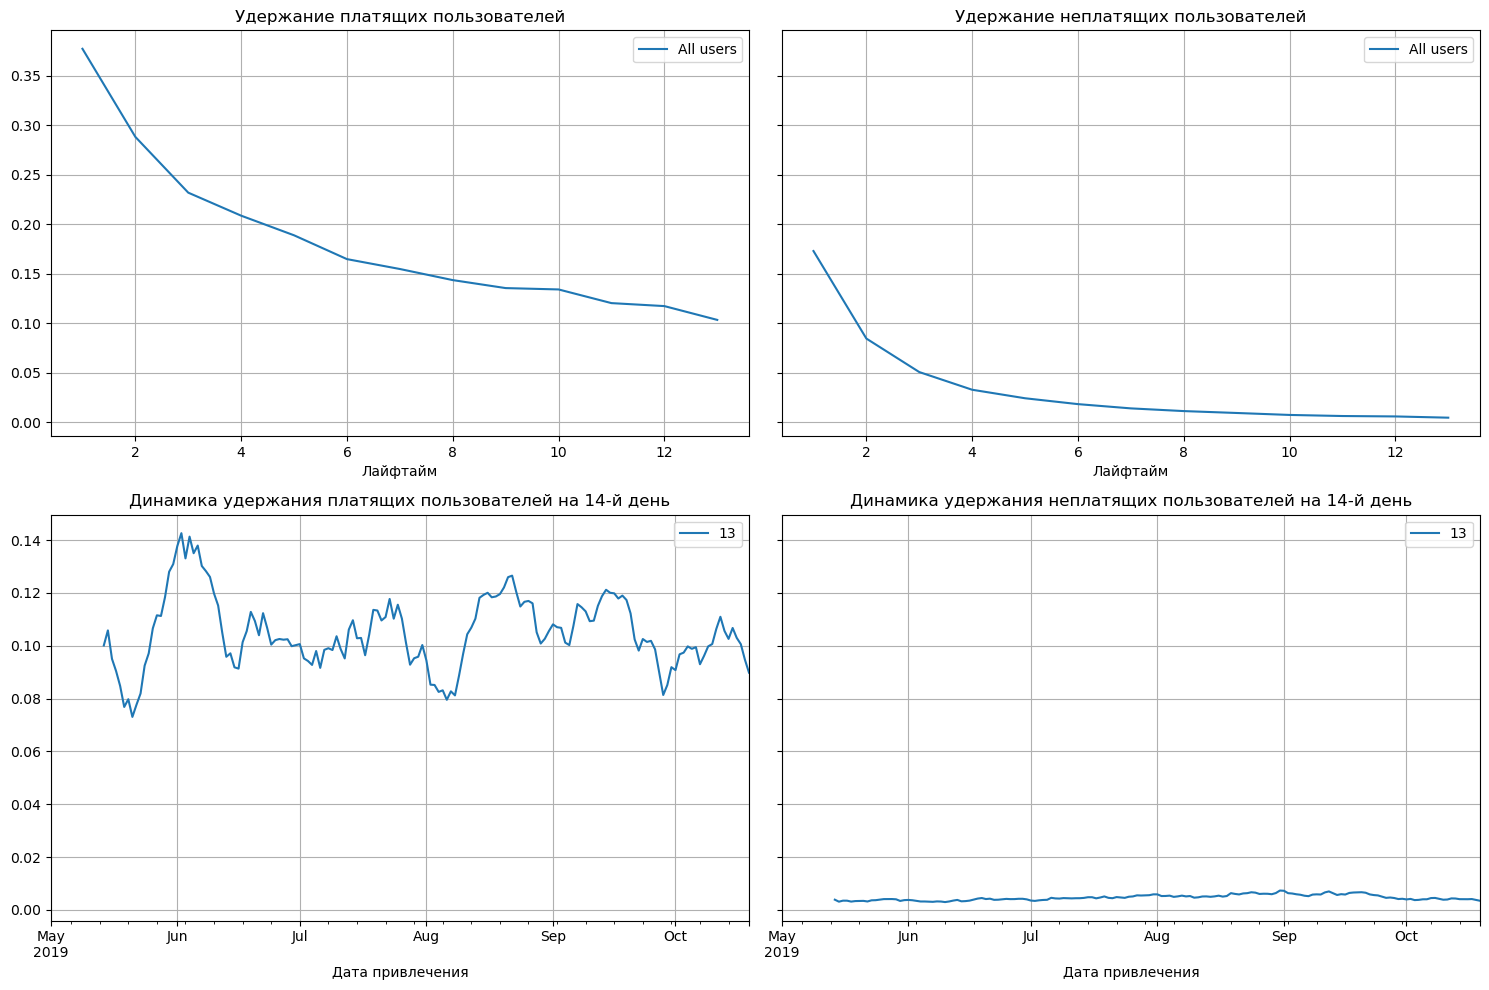

In [55]:
plot_retention(retention_grouped,retention_history, horizon, window=14)

Уровень удержания клиентов - примерно 10% - 12% (по графику динамики удержания) Про неплатящим клиентам уровень около нуля.

Посмотрим, что с конверсией клиентов:

In [56]:
conv_raw, conv_grouped, conv_history = get_conversion(profiles_no, orders_no, observation_date, horizon)

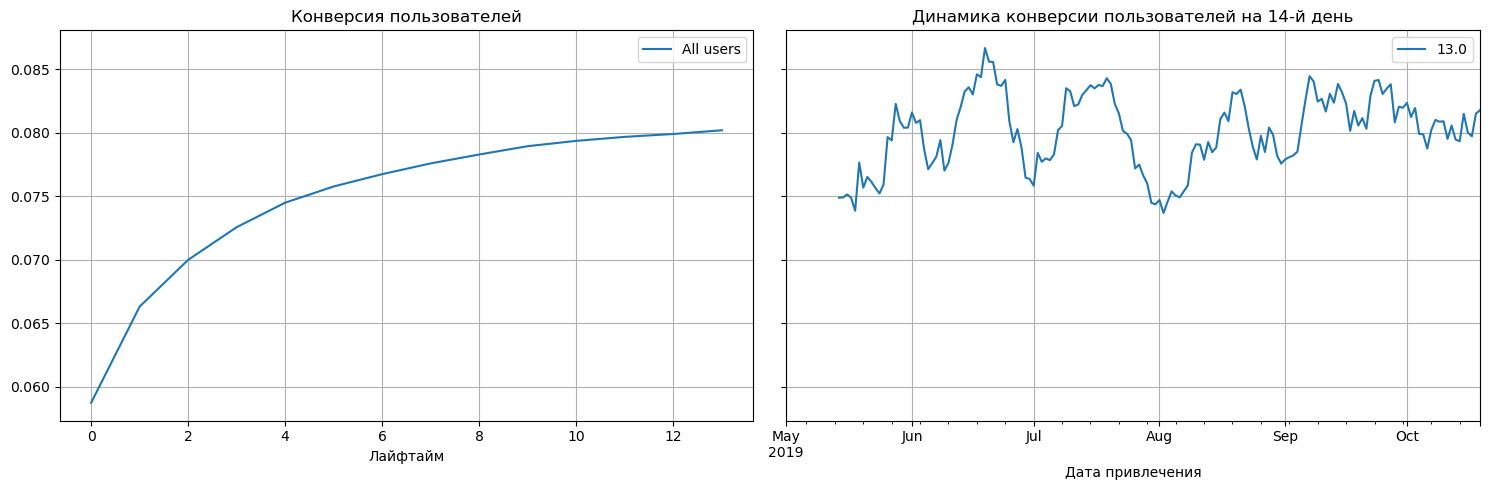

In [57]:
plot_conversion(conv_grouped, conv_history, horizon, window=14)

В целом уровень конверсии на 14 день составляет примерно 8%. Если мы смотрим на динамику конверсии на 14 день, то она пилообразно растет в течении всего исследуемого периода.

#### Разбивка по устройствам

In [58]:
ltv_raw, ltv_grouped, ltv_history,roi_grouped, roi_history = get_ltv(profiles_no, orders_no, observation_date, horizon, dimensions=['device'])

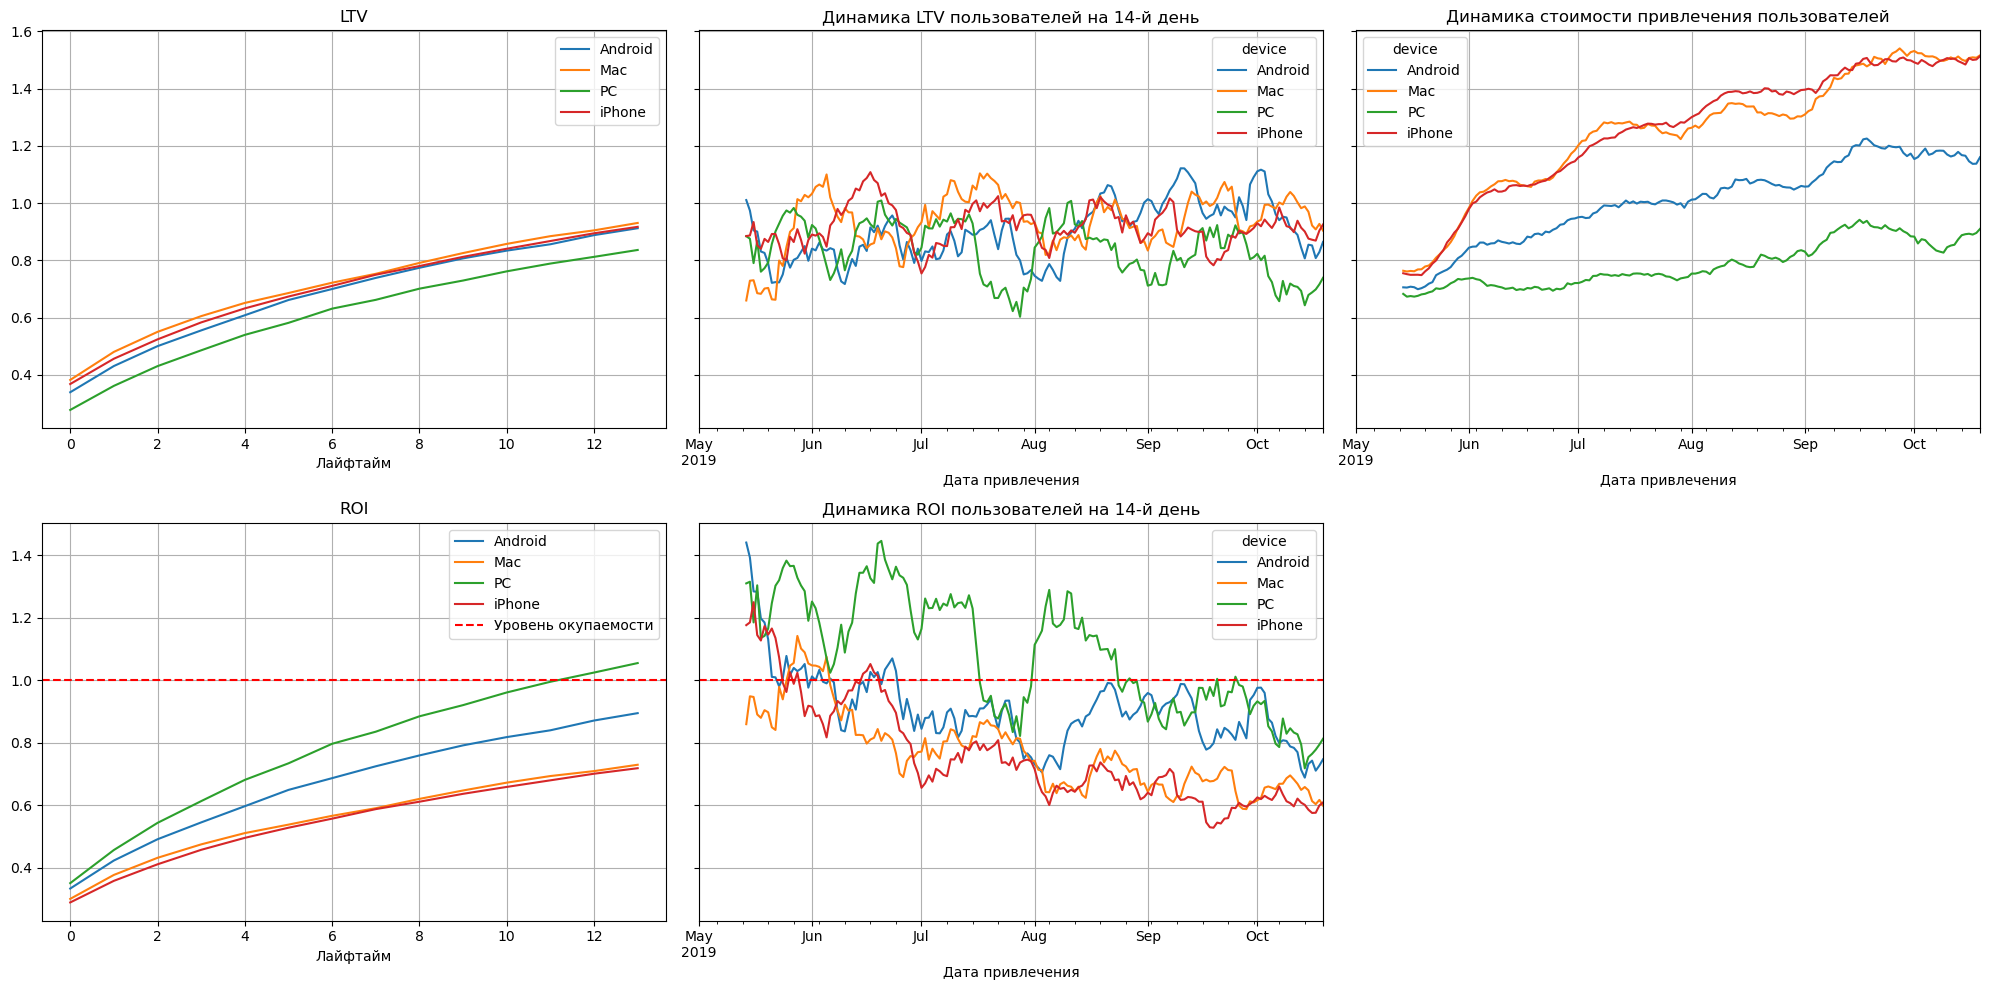

In [59]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, 14, window=14) 

1. По графику LTV видно, что все сегменты устройств растут одинаково
2. динамика LTV на 14-й день имеет пилообразную форму без каких-либо закономерностей - все колебания происходят в одном диапазоне [0.6, 1.1]что является единственной закономерностью на данном графике
3. По динамике стоимоти привлечения для всех сегментов мы наблюдаем значительные рост в июне. Причем наименьший рост был для PC-сегмента, более серьезный рост для Android-сегмента и самый значительный рост для iPhone и Mac-сегментов. В дальнейшем рост продолжается во всех сегментах, но меньше всего в PC, затем в Android и опять же самый большой рост в сегментах IPhone и Mac.
4. Как результат высокой стоимости привлечения клиентов в iPhome и Mac польхователи этих сегментов не окупаются на целевой 14 день, в отличии от пользователей сегмента PC.
5. Если рассмотреть динамику окупаемости на 14 день по месяцам, то здесь неготивная картина по всем сегментам: с мая по ноябрь имеем негативный тренд по всем сегментам. При этом PC-сегмент на конец августа все еще окупается, в то время как Android-сегмент перестал окупаться с конца июня с периодическим "всплытие" до уровня окупаемости со 2-й декады августы по октябрь. В случае с iPhone и Mac сегментами, они ушили ниже уровня окупаемости с конца мая, со "всплытием" до уровня окупаемости в середине июня и далее только опускались ве ниже и ниже. Таким образов именно эти два сегмента ответственны за неокупаемость в целом 

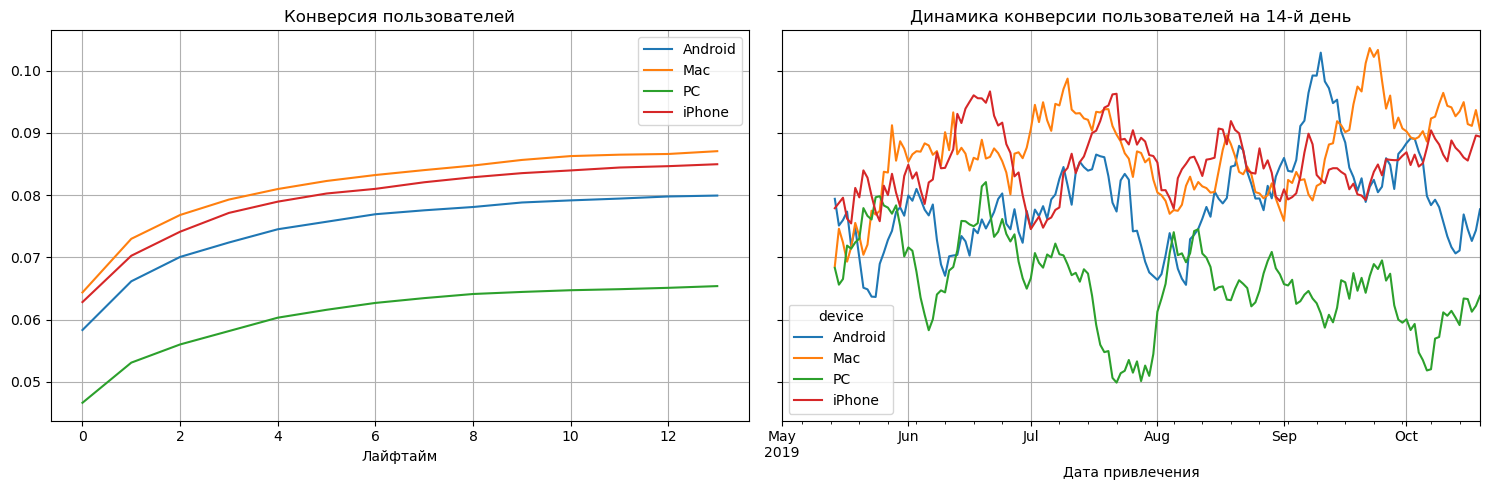

In [60]:
conv_raw, conv_grouped, conv_history = get_conversion(profiles_no, orders_no, observation_date, horizon, dimensions=['device'])
plot_conversion(conv_grouped, conv_history, horizon, window=14)

С точки зрения конверсии, ситуация с iPhone и Mac сегментами лучше, чем с Android-сегментом или PC-сегментом(самый низкий уровень).
Динамика на 14 день также лучше у iPhone и Mac, затем идет Android и последним PC сегмент. 

#### Разбивка по странам

In [61]:
ltv_raw, ltv_grouped, ltv_history,roi_grouped, roi_history = get_ltv(profiles_no, orders_no, observation_date, horizon, dimensions=['region'])

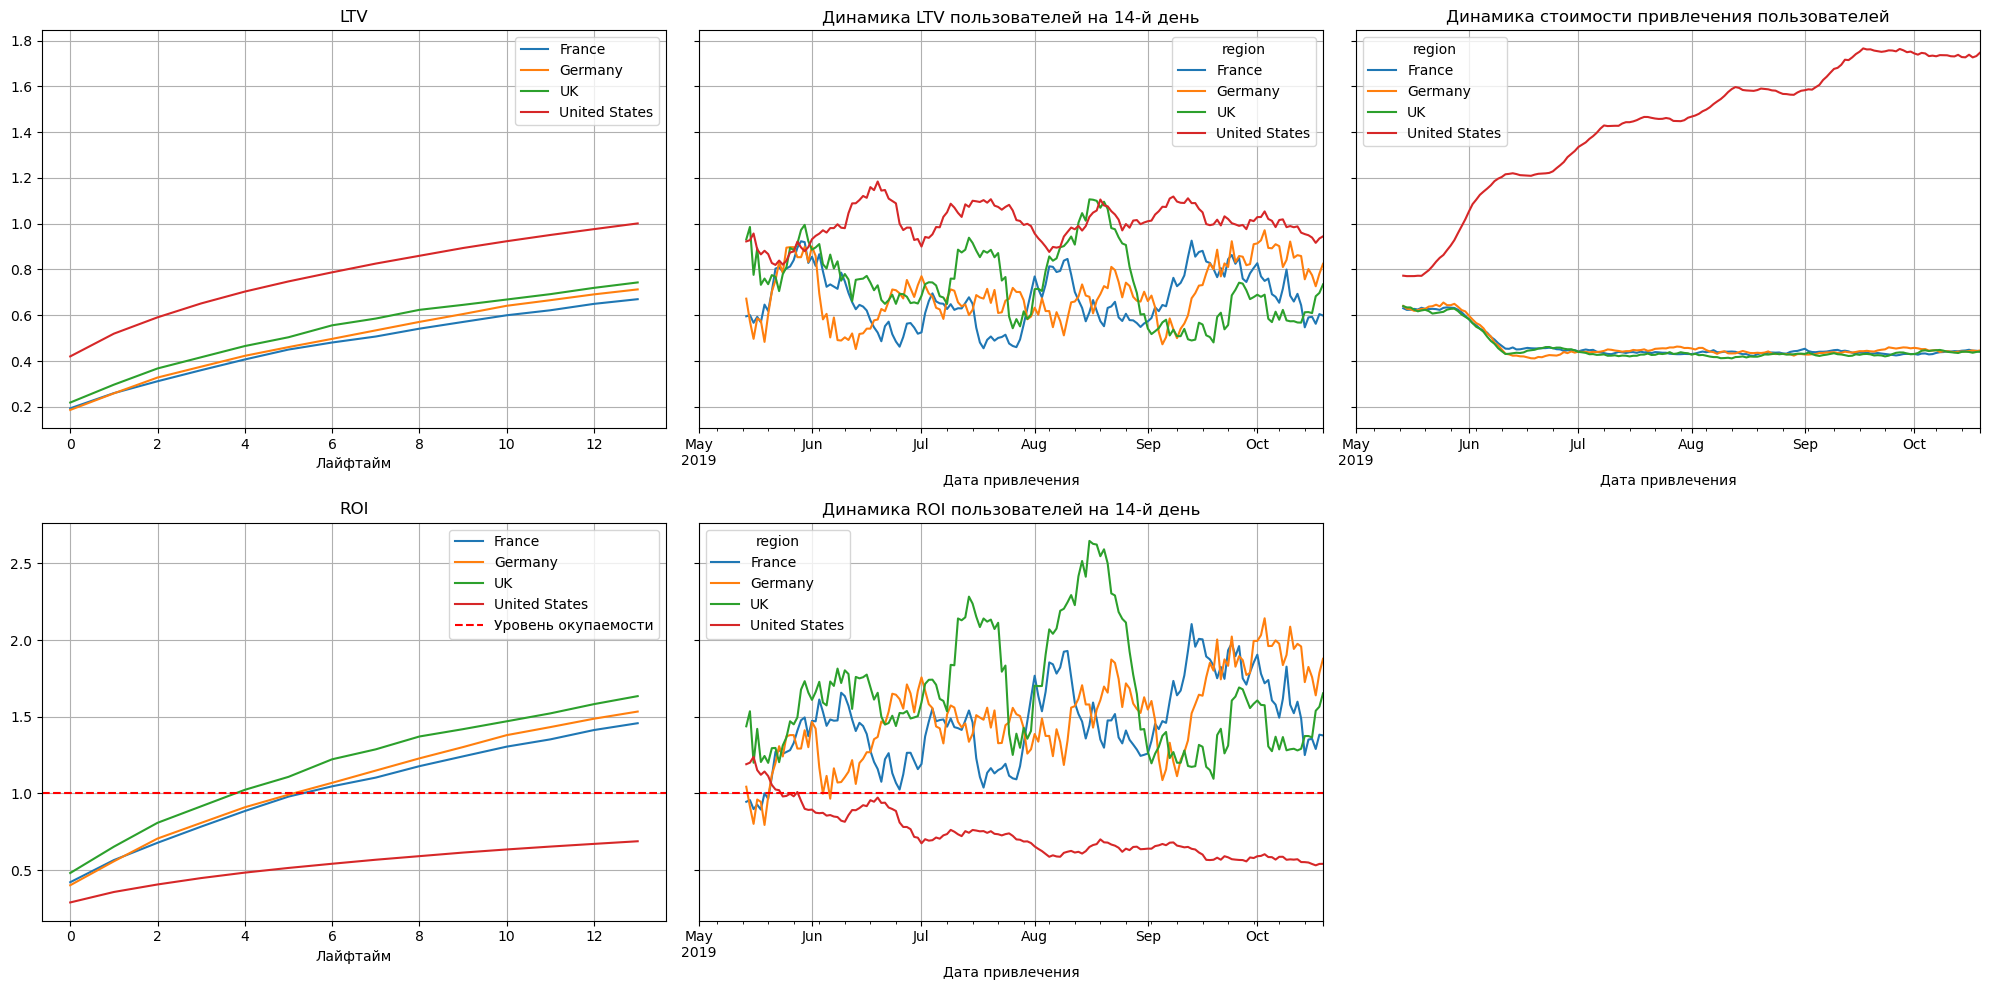

In [62]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, 14, window=14) 

1. По графику LTV видно, что все сегменты устройств растут одинаково, выделяется кривая США - она идет выше всех.
2. динамика LTV на 14-й день имеет пилообразную форму без каких-либо закономерностей - все колебания происходят в одном диапазоне [0.4, 1.2]. Также можно заметить, что диамика LTV пользователей из Америки, не смотря на пилообразную кривую, идет в основном вдоль верхней границы диапазона, а динамика LTV пользователей остальных стран колеблется во всем диапазоне. 
3. По динамике стоимости привлечения мы наблюдаем резкий скачок вверх у пользователей из Америки в начале июня с далнейшим ростом в течении всего остального срока исследования. Остальные страны в конце мая-начале июня падают а затем на фоне данного роста оставались на одном уровне, с небольшими колобаниями, вокруг него.
4. Как результат высокой стоимости привлечения клиентов из США, именно эти пользователи не выходят на уровень окупаемости рекламы. Пользователи из других стран - Германии, Франции, Великобритании - окупают расходы по их привлечению почти в два раза. 
5. Если рассмотреть динамику окупаемости на 14 день по месяцам, то также как и на предыдущем графике графике стоимость привлечения пользователей из стран Европы окупается на 14 день, причем диапазон достаточно широкий от 1,5 до 2.5 раз. Стоимость привлечения покупателей из-за океана в течении мая  также окупалась, но затем окупаемость ушли ниже уровня себестоимости и больше до конца исследуемого прока не поднялась выше этого уровня - клиенты из США с конца мая и до ноября приносили только убытки. 

Помотрим на конверисию в исследуемых странах:

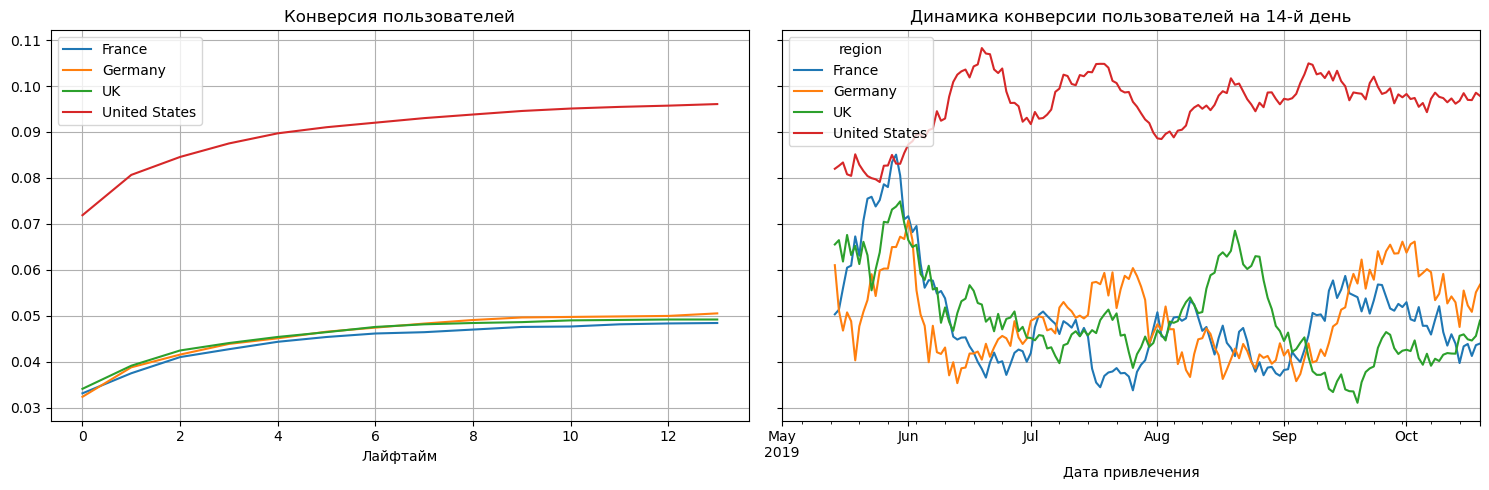

In [63]:
conv_raw, conv_grouped, conv_history = get_conversion(profiles_no, orders_no, observation_date, horizon, dimensions=['region'])
plot_conversion(conv_grouped, conv_history, horizon, window=14)

Конверсия в США, согласно приведенному графику, значительно превышает конверсию стран Европы. Причем если колебание стран Европы происходит в одном диапазоне [0.03, 0.07], то в динамика конверсии пользователей из США, также колеблясь по "пиле" имеет тенденцию к небольшому росту на уровне 0.10.  

#### Разбивка по источникам рекламы

In [64]:
ltv_raw, ltv_grouped, ltv_history,roi_grouped, roi_history = get_ltv(profiles_no, orders_no, observation_date, horizon, dimensions=['channel'])

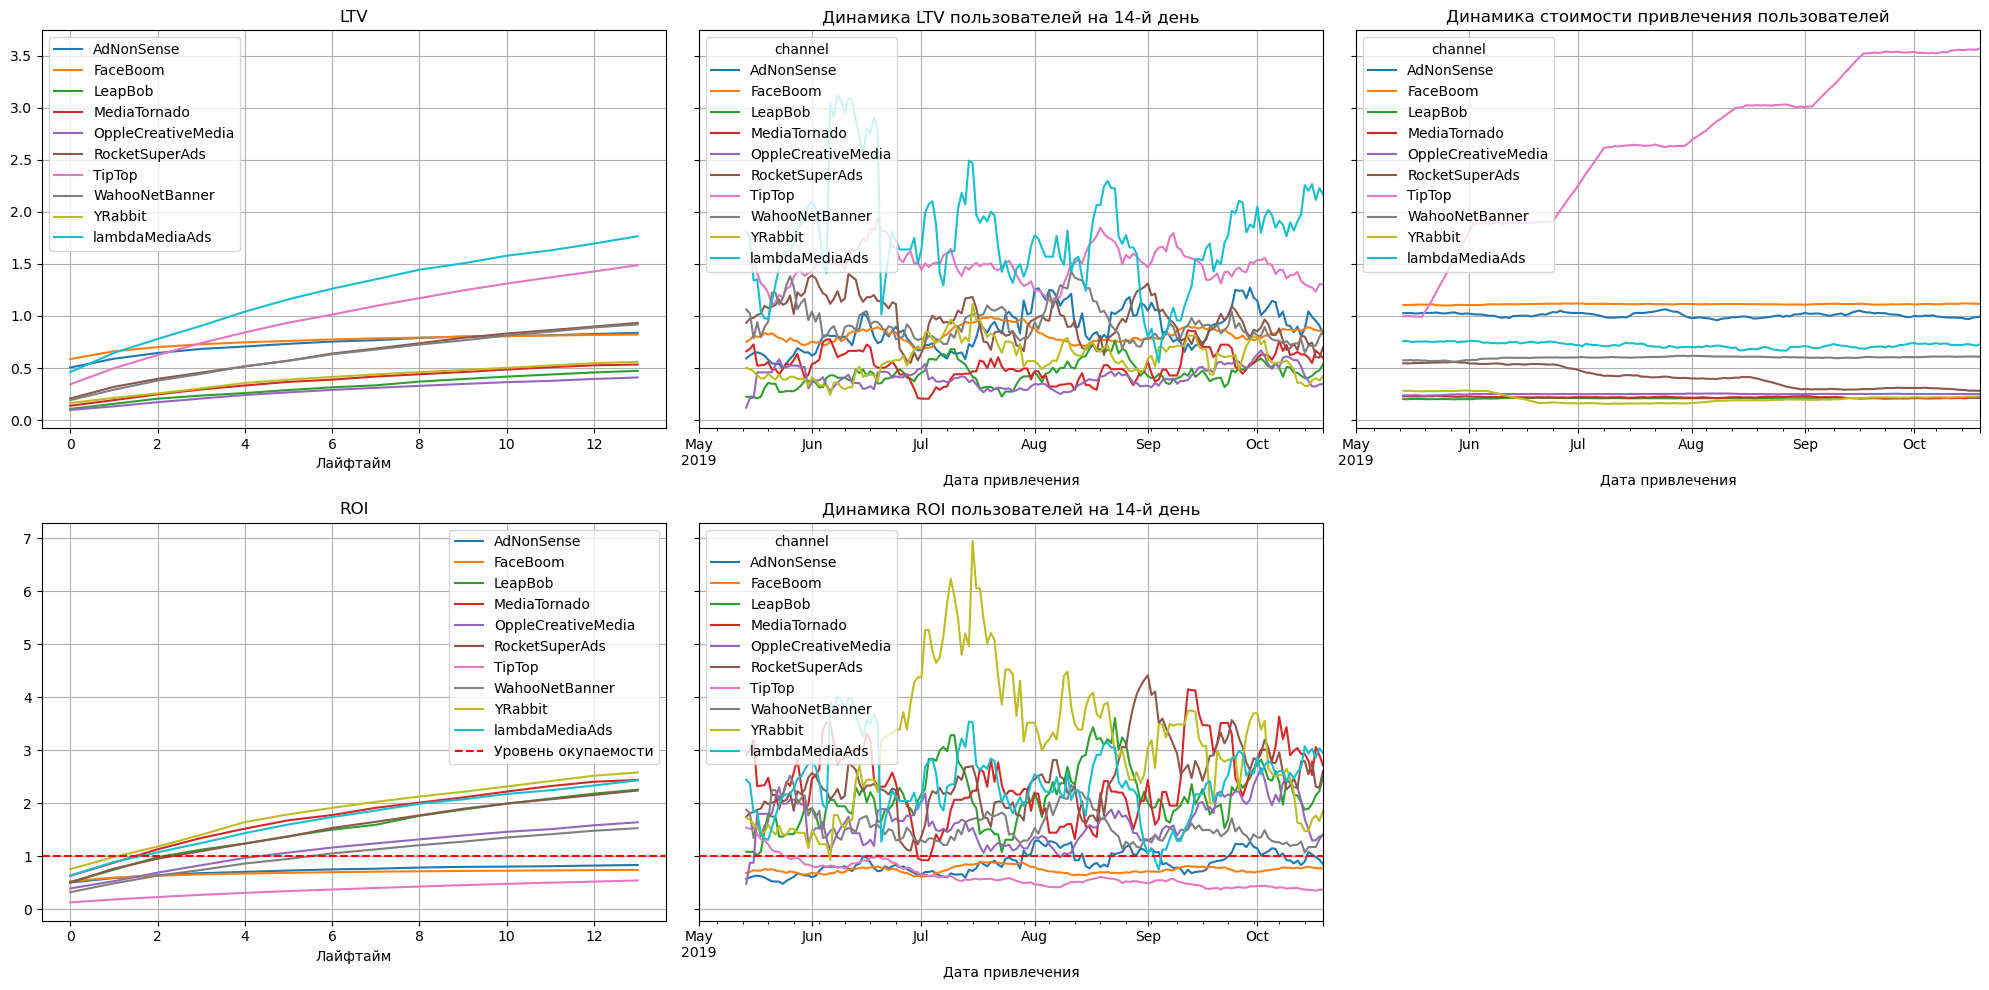

In [65]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, 14, window=14) 

1. По графику LTV видно, что клиенты из 2-х каналов приносят значительно большый доход по сравнению  со всеми остальными это lambdaMediaAds и TipTop. Далее идут RocketSuperAds, FaceBoom и что самое интересное клиенты из бесплатного Organic- канала, остальные 5 каналов приводят клиентов, которые приносят небольшой доход. 
2. динамика LTV на 14-й день имеет пилообразную форму без каких-либо закономерностей - все колебания происходят в одном диапазоне примерно [0.25, 2.5]. Также выделяются 2 канала привлечения - lambdaMediaAds и TipTop, которые колеблются по верхней границе интервала, остальные каналы колеблются от нижней границы и до значения 1.5 . 
3. По динамике стоимости привлечения пользователей каналов особенно выделяется канал TipTop, по которому идет постоянный ступеньчатый рост в течении всего срока, за ним идет FaceBoom, который хоть и не растет в течении срока исследования (остается постоянным), тем не менее стоимость привлечения по этому каналу также выше всех остальных. Не далеко от него ушел  и канал AdNonSense.
4. Как результат высокой стоимости привлечения клиентов, все три выше упомянутых источника (TipTop, FaceBoom, AdNonSense) не окупаются. Больше всего это касаеться канала TipTop с его безумно раздутой стоимостью привлечения клиентов.
5. Если рассмотреть динамику окупаемости на 14 день по месяцам, то картина такая же: с июня не окупается TipTop, в течении всего срока не окупается FaceBoom, на грани окупаемости (то окупается, то нет) клиенты пришедшие из AdNonSense, клиенты пришедшие из остальных каналов окупаются в течении всего срока. 

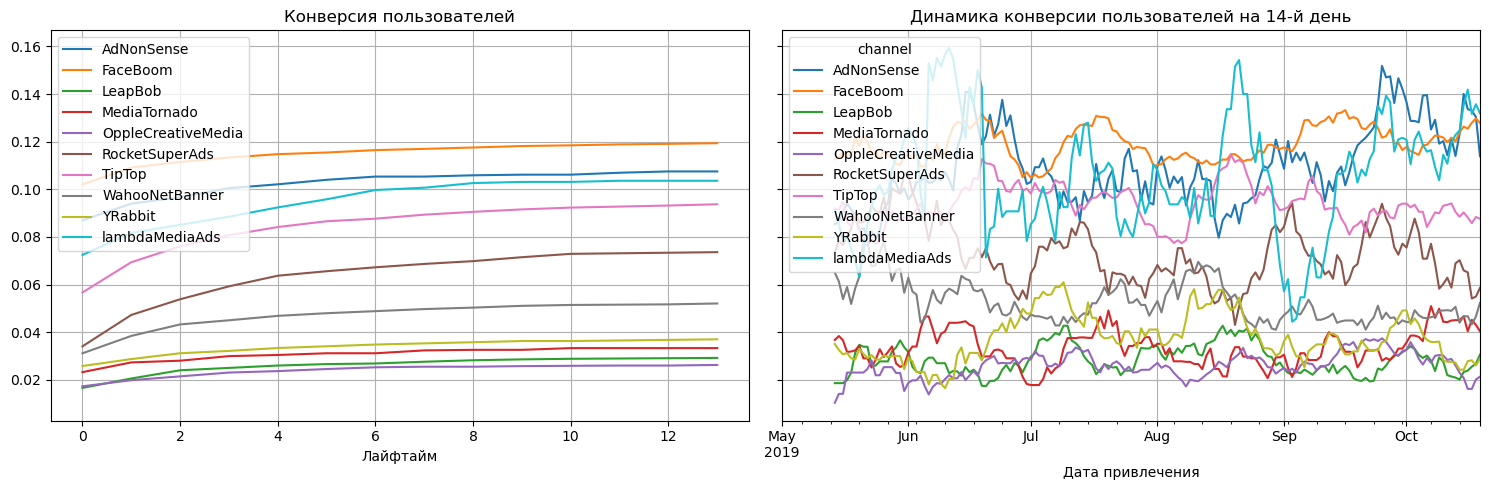

In [66]:
conv_raw, conv_grouped, conv_history = get_conversion(profiles_no, orders_no, observation_date, horizon, dimensions=['channel'])
plot_conversion(conv_grouped, conv_history, horizon, window=14)

С точки зрения конверсии, самая высокая конверсия у FaceBoom, затем с пракически одинаковой конверисией идут AdNonSense и lambdaMediaAds, далее TipTop и RocketSuperAds и все остальные. Ожидаемо на последнем месте по конверсии Organic. 
По динамике конверсии на 14-й день ситуация очень разноплановая - если FaceBoom колеблется примерно с полуторомесячной периодичностью, то в колебаниях AdNonSense периодичности за данный промежуток не видно, есть высока конверсия в начале периода и в конце, lambdaMediaAds вообще кидает из одной крайности в другую - чем выше был подъем, тем сильнее идет за ним падение.

Мы провели анализ окупаемости рекламы по различным срезам, но непонятно окупается ли реклама в целом.<br> 
Сделаем это ниже:

создадим простые свобные таблицы по доходам(orders_no['revenue]) и по расходам(costs_no['costs]), без пользователей из organic:

In [67]:
orders_no['event_dt_date'] = pd.to_datetime(orders_no['event_dt']).dt.month
costs['month'] = pd.to_datetime(costs['dt']).dt.month
rev = orders_no.pivot_table(index='event_dt_date', values='revenue', aggfunc='sum').reset_index().rename(columns={'event_dt_date':'month'})
mar = costs.pivot_table(index='month', values='costs', aggfunc='sum').reset_index()

/tmp/ipykernel_159444/1328778703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_no['event_dt_date'] = pd.to_datetime(orders_no['event_dt']).dt.month


объеденим их по месяцу доходов и расходов и посмотрим на итоговый результат. Если результат плюсовой, то реклама окупается, иначе неокупается.
Для наглядности визуализируем результат данного анализа:

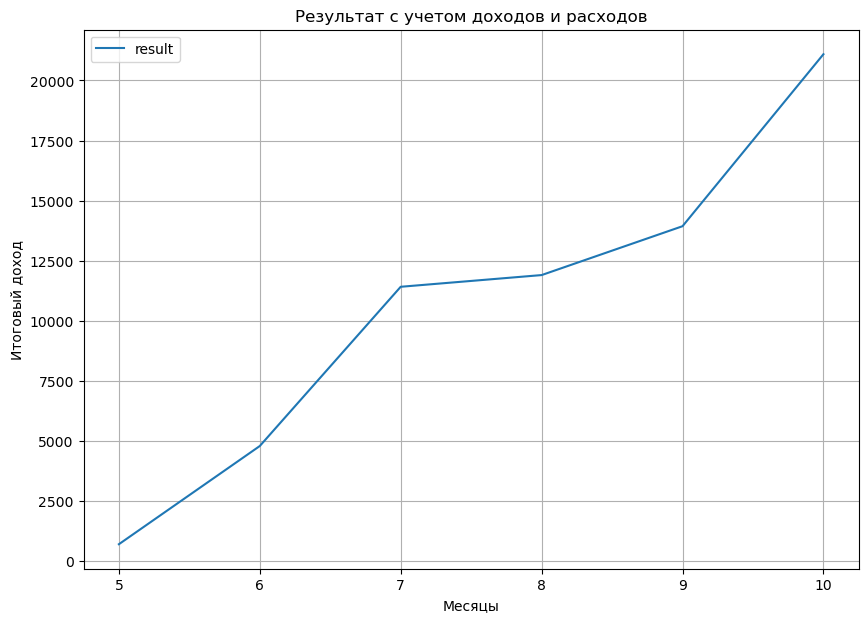

In [68]:
res = rev.merge(mar, on='month', how='left').set_index('month')
res['result'] = res['revenue'] - res['costs']
ax1 = res[['result']].plot(grid=True, title='Результат с учетом доходов и расходов', figsize=(10,7))
plt.ylabel('Итоговый доход')
plt.xlabel('Месяцы')
plt.show()

Как мы видим по графику в целом реклама окупается и компания получает прибыль. При этом прибыль могла быть более высокой. Для этого нужно учесть следующие моменты:
1. Проблемы с окупаемостью у клиентов iPhone и Mac
2. Проблемы у клиентов из США
3. Проблемы клеинтов которые пришли из TipTop и FaceBoom

Может ли быть какая-то связь между этими пунктами. Давайте посмотрим:

Посмотрим как устройства распределены по странам:

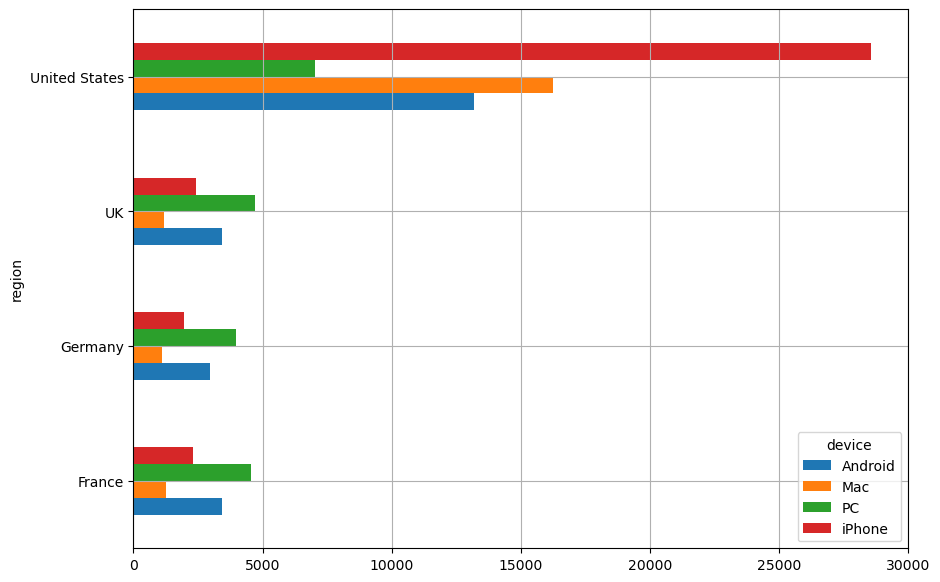

In [69]:
visits_no.pivot_table(index='region', columns='device', values='user_id', aggfunc='nunique').plot(kind='barh', grid=True, figsize=(10,7));

Очевидное преобладание iPhone и Mac в США, хотя там также наблюдается и значитльно большее кол-во Android. 

Посмотрим как распределены каналы по странам:

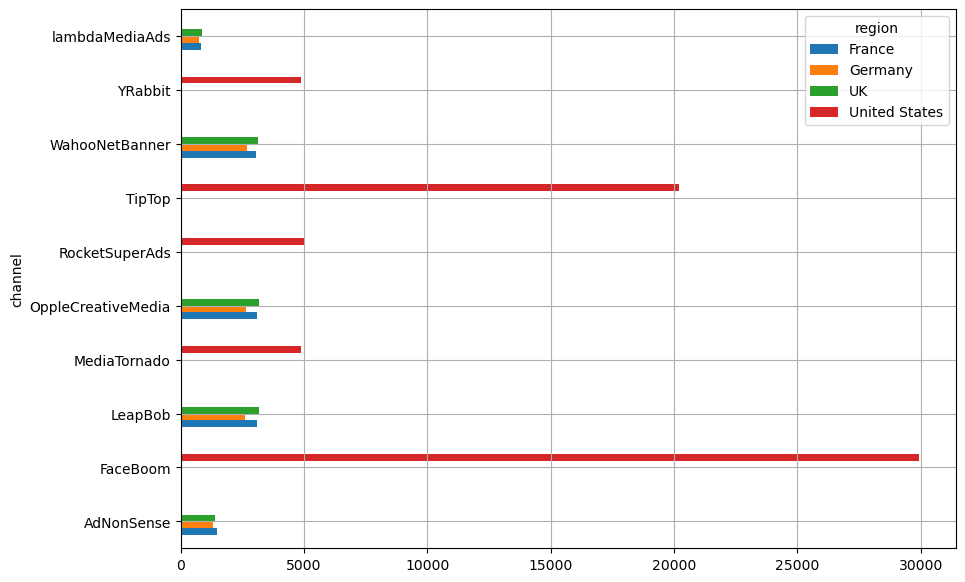

In [70]:
visits_no.pivot_table(index='region', columns='channel', values='user_id', aggfunc='nunique').T.plot(kind='barh', grid=True, figsize=(10,7));

А вот здесь на графике четко прослеживается связь - проблемные каналы FaceBoom и TipTop работают только с американскими пользователями 

Посмотрим как связаны источники рекламы и устройства: 

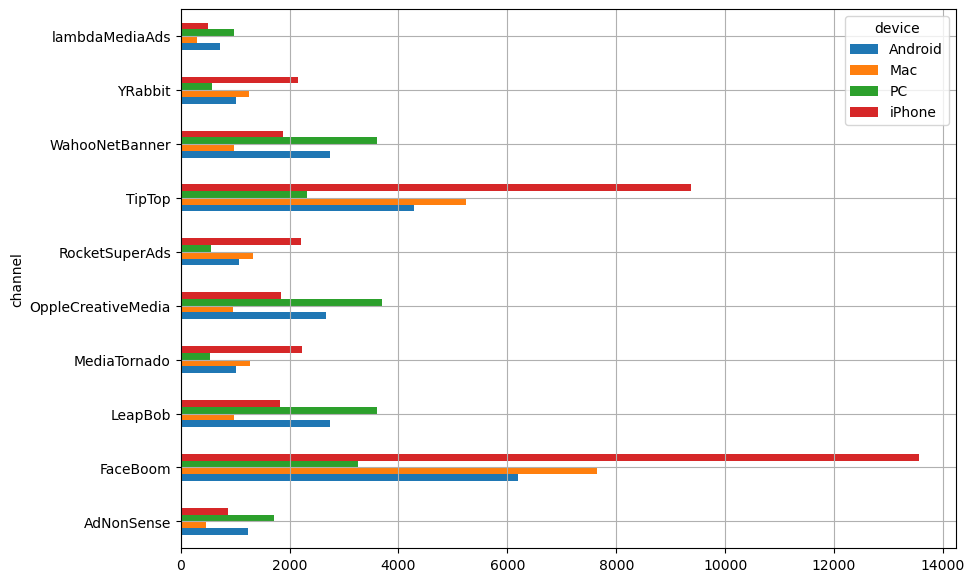

In [71]:
visits_no.pivot_table(index='device', columns='channel', values='user_id', aggfunc='nunique').T.plot(kind='barh', grid=True, figsize=(10,7));

На этом графике мы видим, что интересующие нас каналы FaceBoom и TipTop приводят клиентов больше чем остальные источники рекламы и больше всего пользователей с iPhone и Mac.

Тем не менее, попробуем исключить TipTop и FaceBoom из данных и посмотрим что получится: 

Сначала уберем один источник - TipTop:

In [72]:
visits_new = visits_no.query('~channel.isin(["TipTop"])')     # исключаем данные связанные с каналом TipTop из таблицы данных visits
user_id_new = visits_new["user_id"].unique()               # получаем уникальных ползователей по новым данным
orders_new = orders_no.query('user_id.isin(@user_id_new)')    # исключаем пользователей которые пришли из канала TipTop
costs_new = costs.query('~channel.isin(["TipTop"])')       # исключаем данные связанные с каналом TipTop

In [73]:
profiles_new = get_profiles(visits_new, orders_new,None, costs_new)

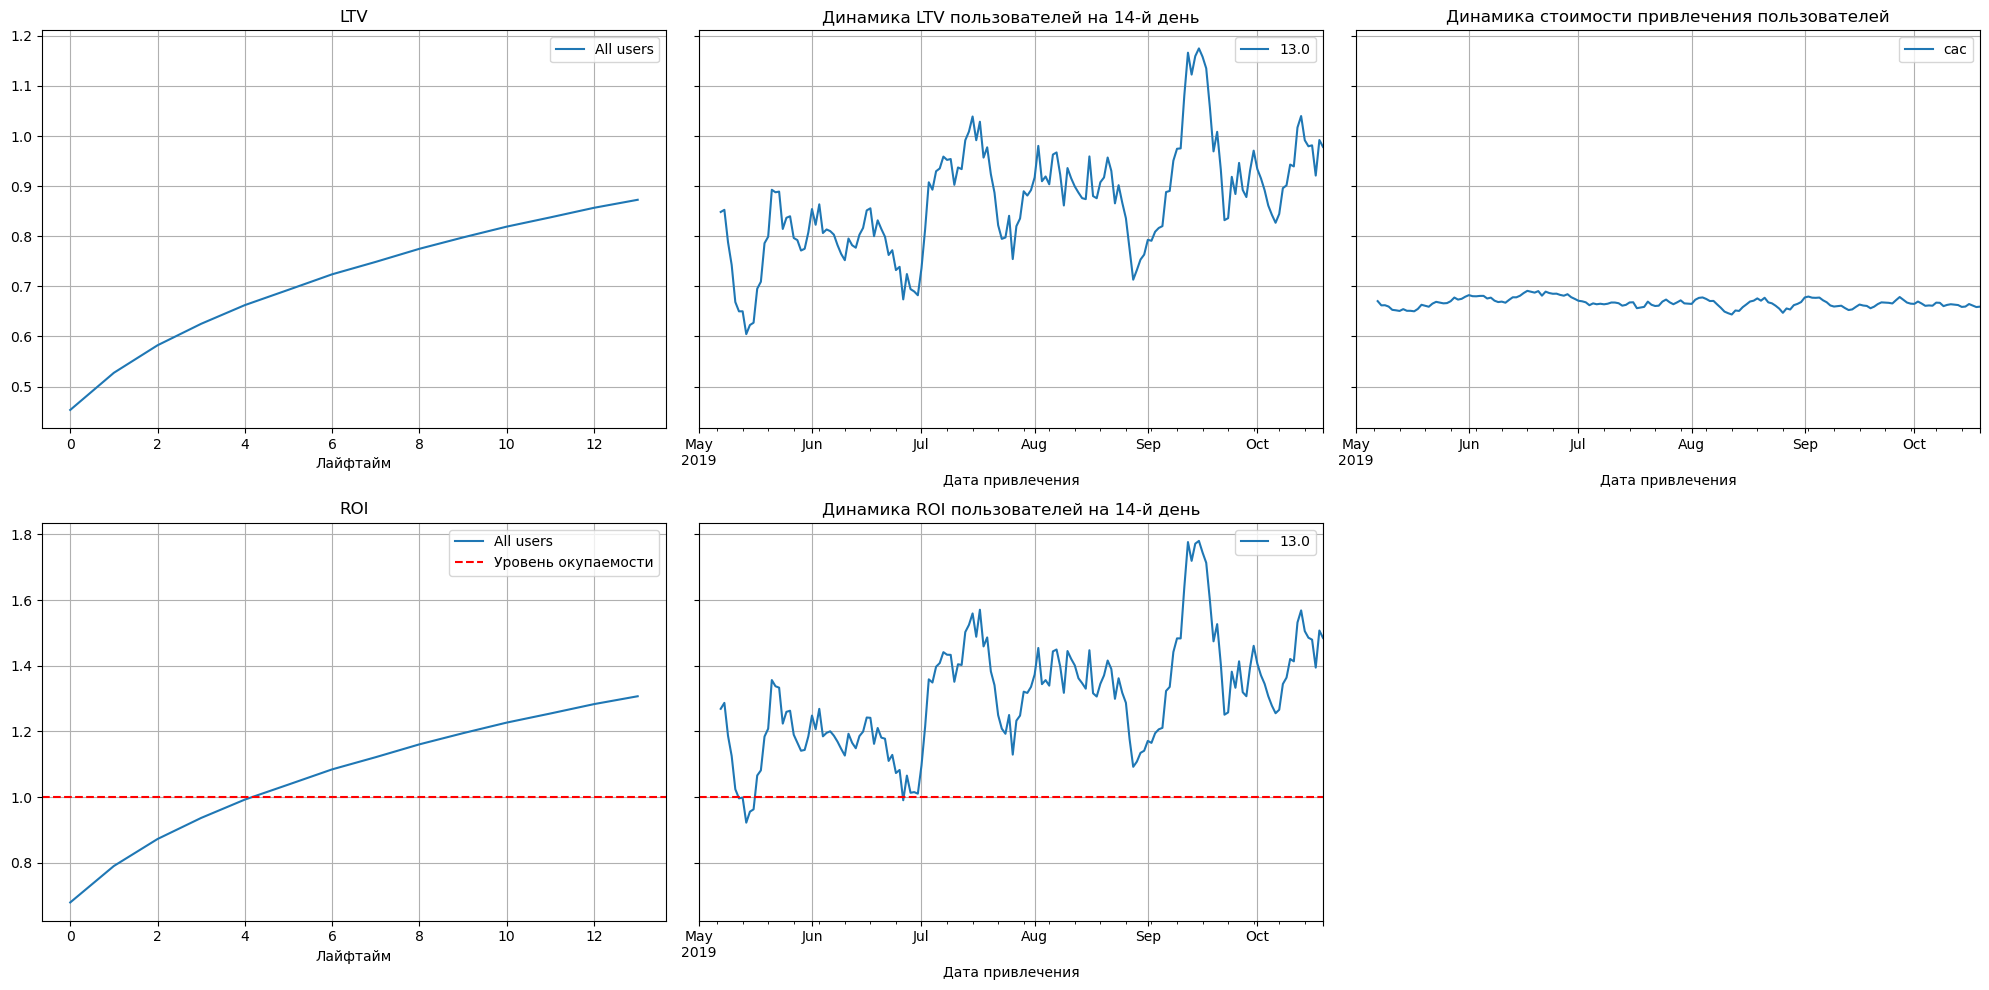

In [74]:
ltv_raw, ltv_grouped, ltv_history,roi_grouped, roi_history = get_ltv(profiles_new, orders_new, observation_date, horizon)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, 14) 

Что ж мы видим значительные рост окупаемости  - 1.3 раза на 14 день

Посмотрим измениться ли что-нибудь если мы уберем еще один дорогостоящий источник рекламы - FaceBoom:

In [75]:
visits_new = visits_no.query('~channel.isin(["TipTop", "FaceBoom"])')     # исключаем данные связанные с каналоми TipTop, FaceBoom из таблицы данных visits
user_id_new = visits_new["user_id"].unique()               # получаем уникальных ползователей по новым данным
orders_new = orders_no.query('user_id.isin(@user_id_new)')    # исключаем пользователей которые пришли из каналов TipTop, FaceBoom
costs_new = costs.query('~channel.isin(["TipTop", "FaceBoom"])')       # исключаем данные связанные с каналоми TipTop, FaceBoom

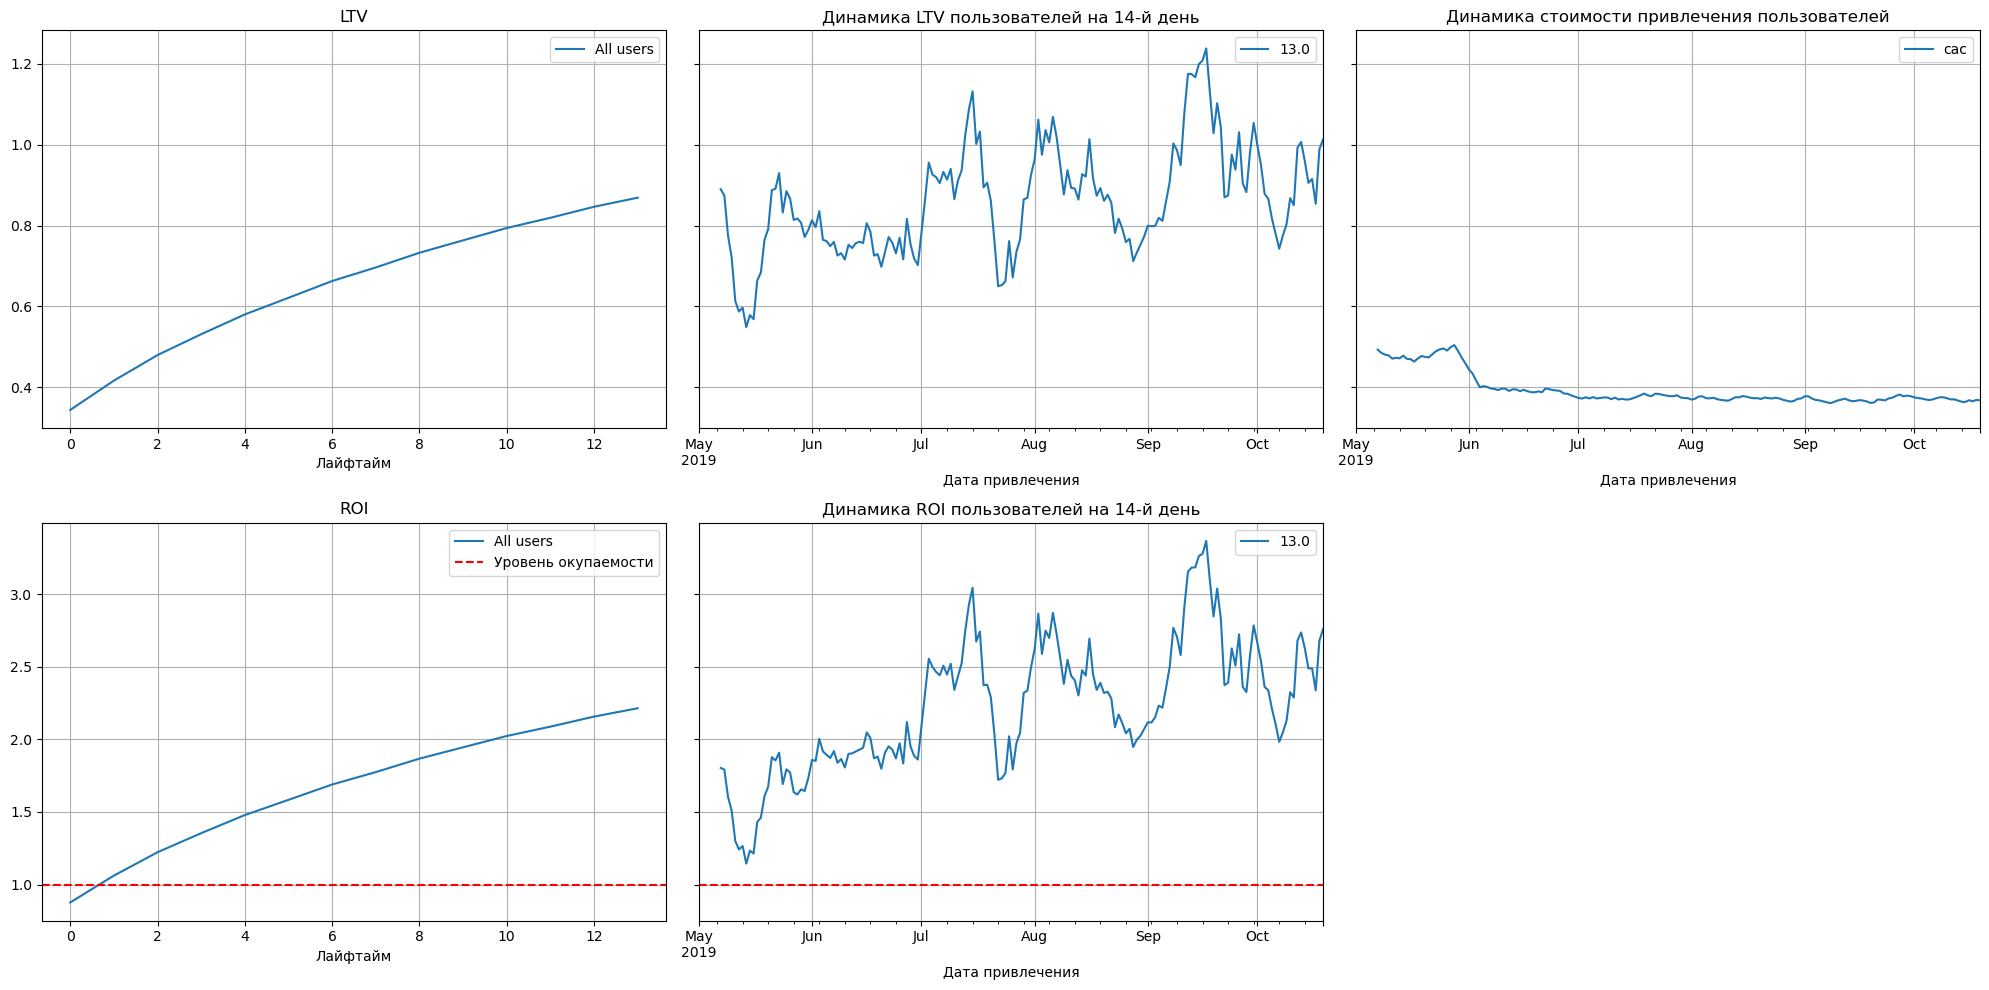

In [76]:
profiles_new = get_profiles(visits_new, orders_new,None, costs_new)
ltv_raw, ltv_grouped, ltv_history,roi_grouped, roi_history = get_ltv(profiles_new, orders_new, observation_date, horizon)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, 14) 

Итак мы видим рост окупаемости еще выше - почти 2.25 раза по сравнению с неокупаемостью рекламы, когда мы брали в расчет все источники рекламы

Таким образом, в данном случае для повышения доходности продукта необходимо прекратить вкладывать деньги в источники рекламы FaceBoom и TipTop так как стоимость привлечение клиентов из этих каналов значительно выше других источников, и даже несмотря на высокую конверсию и большое кол-во пользователей, которые приходят из этих каналов, в итоге эти клиенты принсят убыток компании(стоимость их привлечение не окупается).


Посмотрим, изменилась ли итоговая доходность с учетом исключения из доходов и расходов все моментов связанных с TipTop и FaceBoom:

создадим новый сводные таблицы с учетом исклбчения из анализа двух каналов:

In [77]:
orders_new['event_dt_date'] = pd.to_datetime(orders_new['event_dt']).dt.month
costs_new['month'] = pd.to_datetime(costs_new['dt']).dt.month
rev_new = orders_new.pivot_table(index='event_dt_date', values='revenue', aggfunc='sum').reset_index().rename(columns={'event_dt_date':'month'})
mar_new = costs_new.pivot_table(index='month', values='costs', aggfunc='sum').reset_index()

/tmp/ipykernel_159444/3101034468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_new['event_dt_date'] = pd.to_datetime(orders_new['event_dt']).dt.month
/tmp/ipykernel_159444/3101034468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  costs_new['month'] = pd.to_datetime(costs_new['dt']).dt.month


Произведем их объединение и осавим только столбец с конечным результатом:

In [78]:
res_new = rev_new.merge(mar_new, on='month', how='left').set_index('month')
res_new['result'] = res_new['revenue'] - res_new['costs']
res_new = res_new[['result']]
res = res[['result']]


Объеденим старый результат(со всеми каналами) и новый(без TipTop и FaceBoom) и визуализируем итог, оба без пользователей из organic:

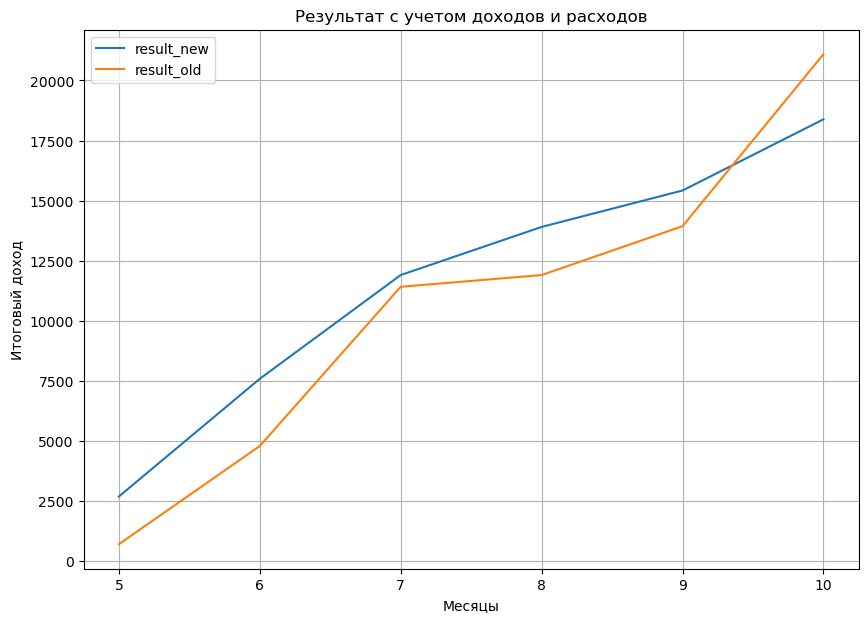

In [79]:
res_new = res_new.join(res, on='month',how='left', lsuffix='_new', rsuffix='_old')
res_new.plot(grid=True, title='Результат с учетом доходов и расходов', figsize=(10,7))
plt.ylabel('Итоговый доход')
plt.xlabel('Месяцы')
plt.show()

Наше предположение,что если мы не будем вкладываться в TipTop и FaceBoom,то прибыль вырастет - подтвердилось! 

## Выводы

В ходе данного исследования были выполнены следующие мероприятия:
1. Изучены предоставленные данные - пропусков данных не обнаружено, аномалий данных не выявлено
2. Данные проверены на дубликаты - дубликаты данных не выявлены
3. Проведен исследовательский анализ, который показал, что:
    - Больше всего клиентов приходят из США - 67% от всех пользователей. От туда же и больше всего клиентов, которые платят - 7.41%
    - Среди устройств больше всего пользователей с iPhone - 52 436 что составляет 36% от всех пользователей. Они же хорошо платят - 6.61%. Это второй результат после Mac - 6.84% При это м Mac имеет самое маленькое кол-во пользователей - 28 945
    - Самые крупные каналы по привлечению пользователей - FaceBoom и TipTop на них приходится 33% всех пользователей, кол-во платящих клиентов пришедших с этих каналов также достаточно велико и составляет соостветственно 13.92% и 10.67%
    - Общие расходы на рекламу составляют 105 497 у.е
    - 80% этих расходов приходится на 2 источника рекламы - TipTop - 51.90%, FaceBoom - 30.75%
    - стоимость привлечения ползователей (CAC) у этих каналов также самая высокая ис составляет: TipTop - 2.8 у.е., FaceBoom - 1.11 у.е. При средней стоимости привлечения 1.12.
    - В целом динамика стоимости привлечения пользователя растет в течении всего срока исследования
    - ROI на 14 день не окупается и динамика ROIна 14 день в течении всего срока негативная, а  середины июля уходит ниже уровня окупаемости
    - При анализе данных с разбивкой по устройствам мы имеем, что Mac и iPhone с одной стороны устройства с самой высокой конверсией     пользователей, с друглй стороны, устрайства владельцы которых являются пользователями, которые не окупаются с точки зрения рекламных расходов потраченных на их привлечение. 
    - При анализе данных в разрезе стран - не окупаются клиенты пришедшеие из США, даже несотря на самую высокую конверсию, т.к стоимость их привлечения значительно растет в течении всего срока исследования, что и приводит к негативным результатам по ROI. Динамика ROI на 14 день показывает негативный тренд в течении всего срока и в конце июня пересекает уровень себестоимости и уходит в минус. Остальные страны(UK, Germany, France) все время нвходятся в зоне окупаемости.
    - При анализе данных в разрезе источников рекламы (каналов привлечения пользователей), у нас выделяются два канала - TipTop и Faceboom. Вообщем это не удивительно, с их раздутыми раклаными бюджетами и самой высокой стоимостью привлечения пользователей (что мы видели ранее в анализе). ROI двух этих каанлов не выходят на уровень окупаемости и с точки зрения динамики практически весь период находятся ниже уровня окупаемости в отличии от других каналов.  
    - Если считать окупаемость в лоб, т.е. доходы минус расходы, то результат получается положительный с постоянным ростом с течением времени.
    При этом если мы исключим расходы и доходы свяханные с двумя каналами: TipTop и FaceBoom, то компания может получить большую прибыль.  


## Рекомендации для маркетологов

1. Контролировать не только такие параметры и метрики как кол-во новых пользователей и конверсию, но и стоимость привлечения клиентов, ROI и динамику ROI на 14 день по рекламным источникам, по устройствам и странам. Это позволит вовремя отследить негативные тенденции и остановить рекламную активность направленную на определенный сегмент пользователей, который ухудшает показатели компании.
2. Прежде чем начинать полноценную рекламную активность на новом канале, провести тестовый запуск(небольшая сумма) с анализом всех показателей и подведением итогов тестовой компании. Если компания оправдывает ожидания и показывает нужные результаты, то с акналом можно начинать полноценно работать, продаолжая тем не менее его регулярно мониторить как указано в первом пункте.
3. Регулярно проводить аудит существующих имточников рекламы и избавляться от наименее выгодных, с возможной заменой новыми.  